<a href="https://colab.research.google.com/github/DantesDesmond/Modelo/blob/main/Modelo_de_pruebas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este modelo esta propuesto para la detección de fraudes en reclamaciones al seguro vehicular y sirve como muestra de experticia de la certificación experto en data obtenida por el instituto A2 capacitaciones.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [ ]:
data = pd.read_csv(r"/content/fraud_oracle.csv")

In [ ]:
data.head(3)

Month  WeekOfMonth  DayOfWeek   Make AccidentArea DayOfWeekClaimed  \
0   Dec            5  Wednesday  Honda        Urban          Tuesday   
1   Jan            3  Wednesday  Honda        Urban           Monday   
2   Oct            5     Friday  Honda        Urban         Thursday   

  MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  Age          Fault  \
0          Jan                   1  Female        Single   21  Policy Holder   
1          Jan                   4    Male        Single   34  Policy Holder   
2          Nov                   2    Male       Married   47  Policy Holder   

          PolicyType VehicleCategory     VehiclePrice  FraudFound_P  \
0  Sport - Liability           Sport  more than 69000             0   
1  Sport - Collision           Sport  more than 69000             0   
2  Sport - Collision           Sport  more than 69000             0   

   PolicyNumber  RepNumber  Deductible  DriverRating Days_Policy_Accident  \
0             1         12         300             1         more than 30   
1             2         15         400             4         more than 30   
2             3          7         400             3         more than 30   

  Days_Policy_Claim PastNumberOfClaims AgeOfVehicle AgeOfPolicyHolder  \
0      more than 30               none      3 years          26 to 30   
1      more than 30               none      6 years          31 to 35   
2      more than 30                  1      7 years          41 to 50   

  PoliceReportFiled WitnessPresent AgentType NumberOfSuppliments  \
0                No             No  External                none   
1               Yes             No  External                none   
2                No             No  External                none   

  AddressChange_Claim NumberOfCars  Year BasePolicy  
0              1 year       3 to 4  1994  Liability  
1           no change    1 vehicle  1994  Collision  
2           no change    1 vehicle  1994  Collision

In [ ]:
data.describe().round(2)

WeekOfMonth  WeekOfMonthClaimed       Age  FraudFound_P  PolicyNumber  \
count     15420.00            15420.00  15420.00      15420.00      15420.00   
mean          2.79                2.69     39.86          0.06       7710.50   
std           1.29                1.26     13.49          0.24       4451.51   
min           1.00                1.00      0.00          0.00          1.00   
25%           2.00                2.00     31.00          0.00       3855.75   
50%           3.00                3.00     38.00          0.00       7710.50   
75%           4.00                4.00     48.00          0.00      11565.25   
max           5.00                5.00     80.00          1.00      15420.00   

       RepNumber  Deductible  DriverRating      Year  
count   15420.00    15420.00      15420.00  15420.00  
mean        8.48      407.70          2.49   1994.87  
std         4.60       43.95          1.12      0.80  
min         1.00      300.00          1.00   1994.00  
25%         5.00      400.00          1.00   1994.00  
50%         8.00      400.00          2.00   1995.00  
75%        12.00      400.00          3.00   1996.00  
max        16.00      700.00          4.00   1996.00

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [ ]:
data.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

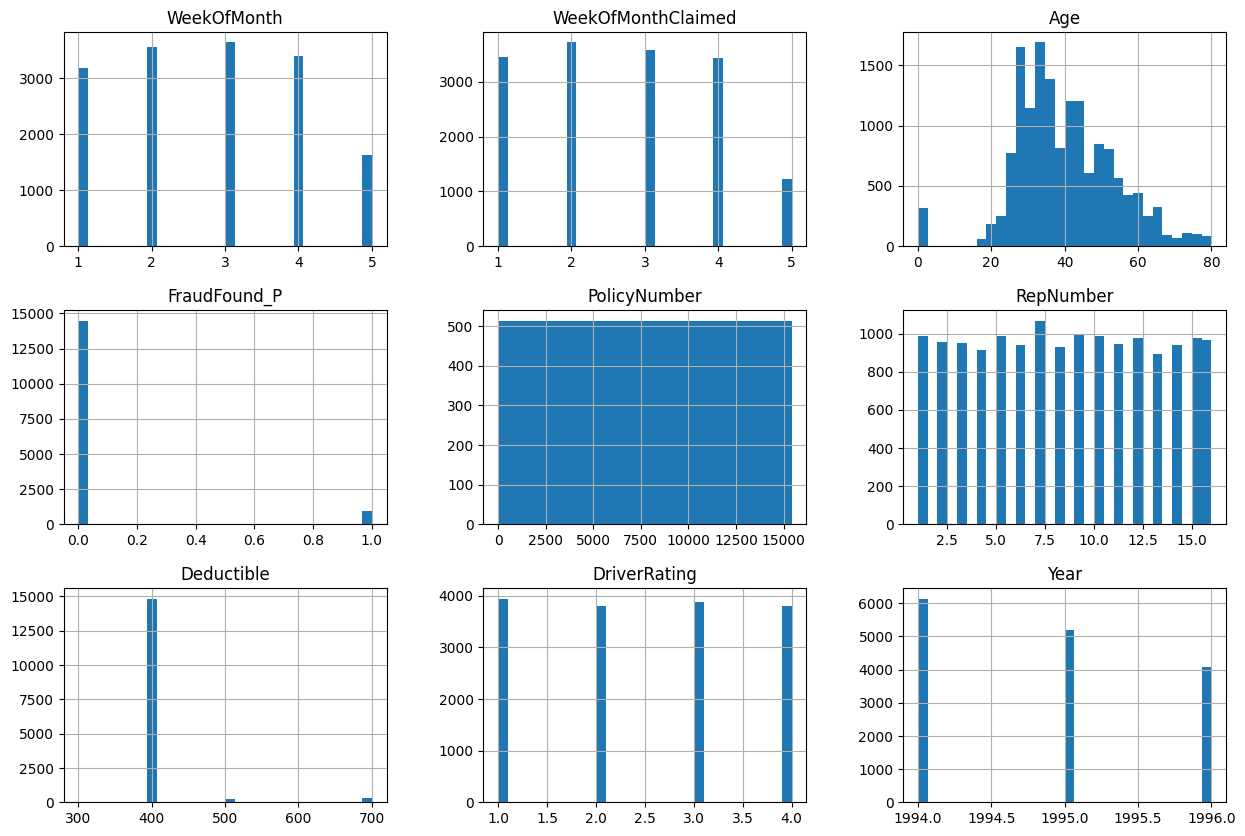

In [ ]:
data.hist(bins=30, figsize=(15, 10))
plt.show()

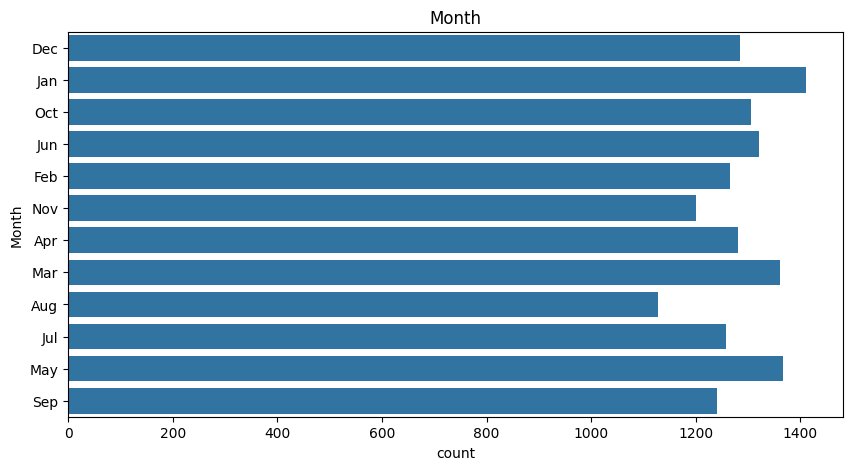

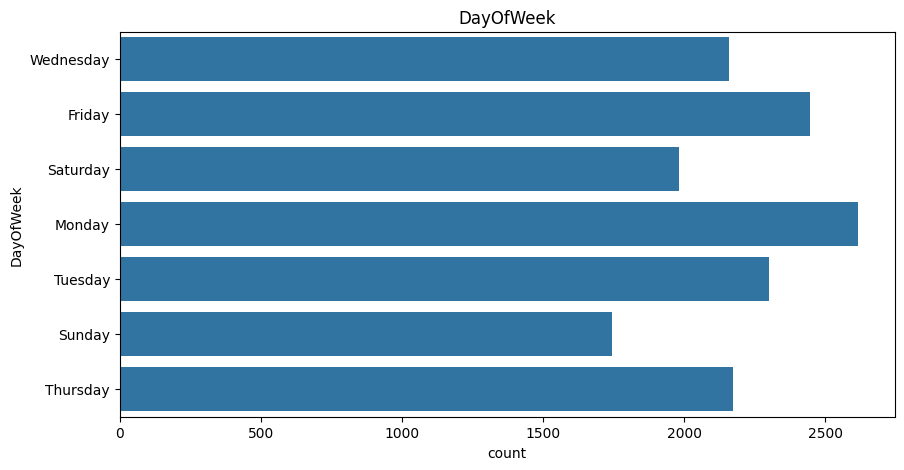

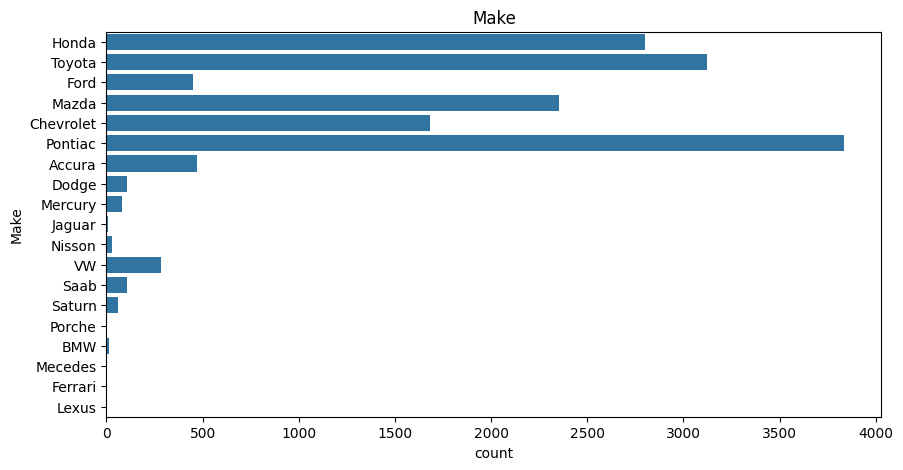

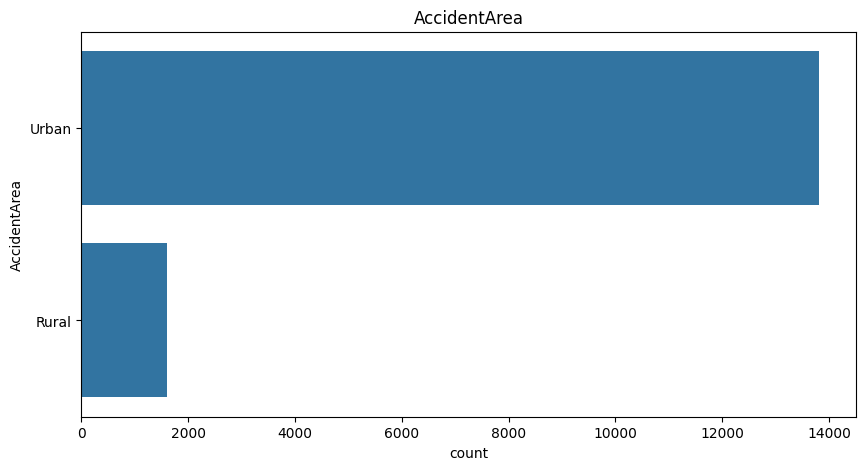

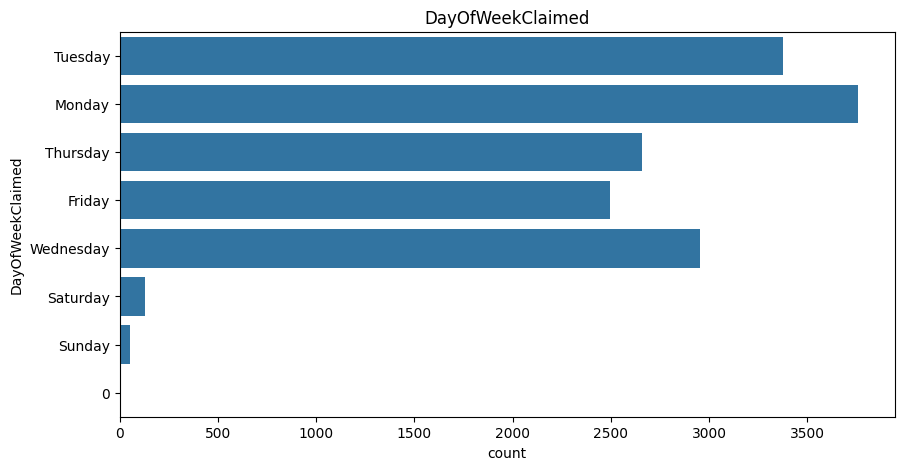

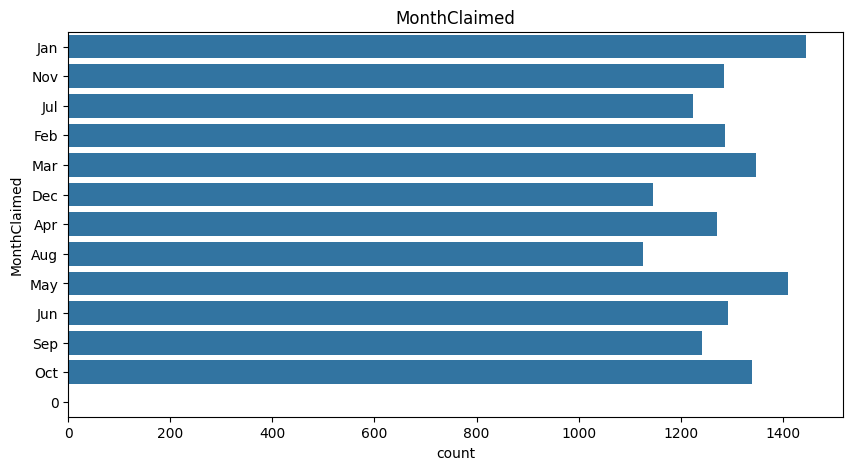

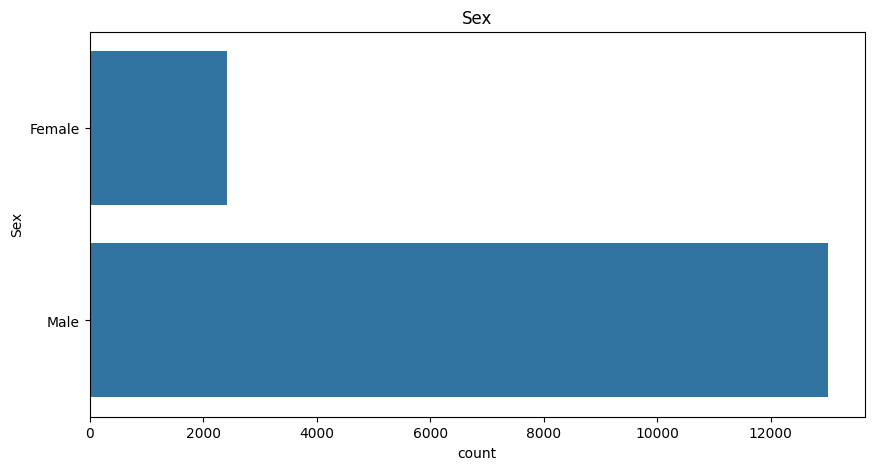

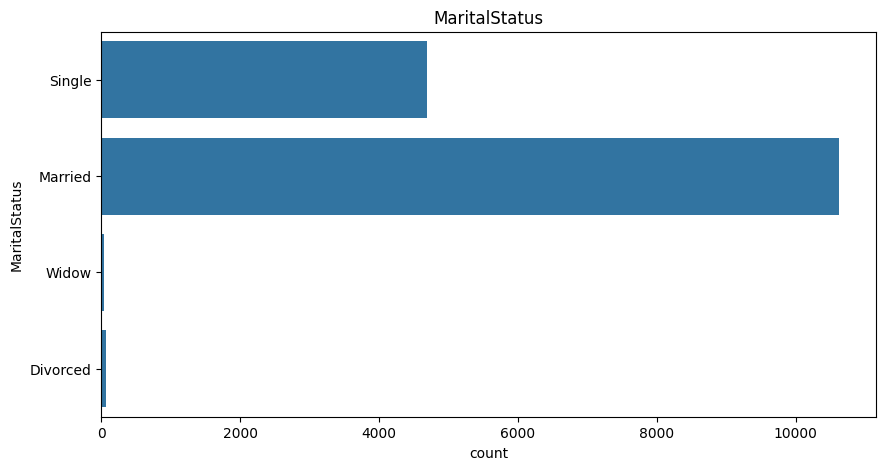

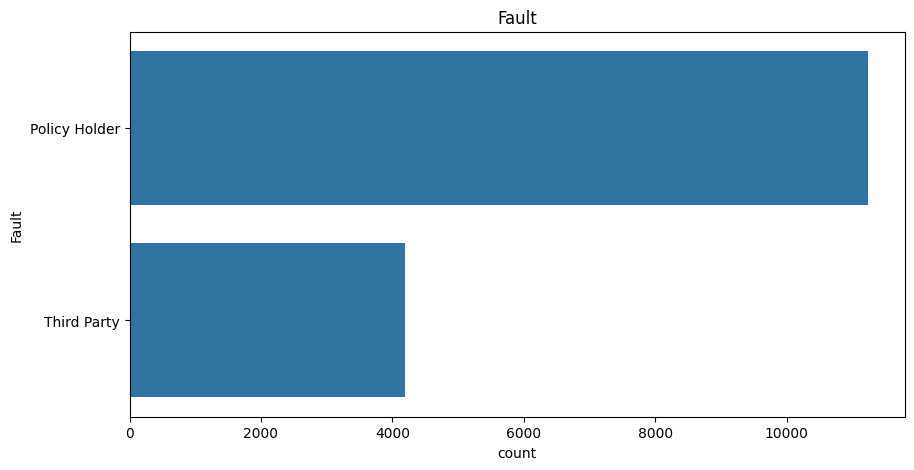

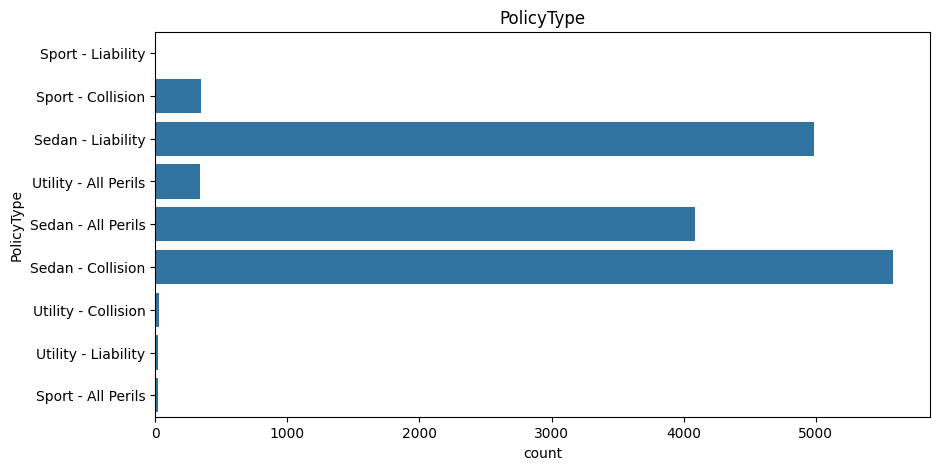

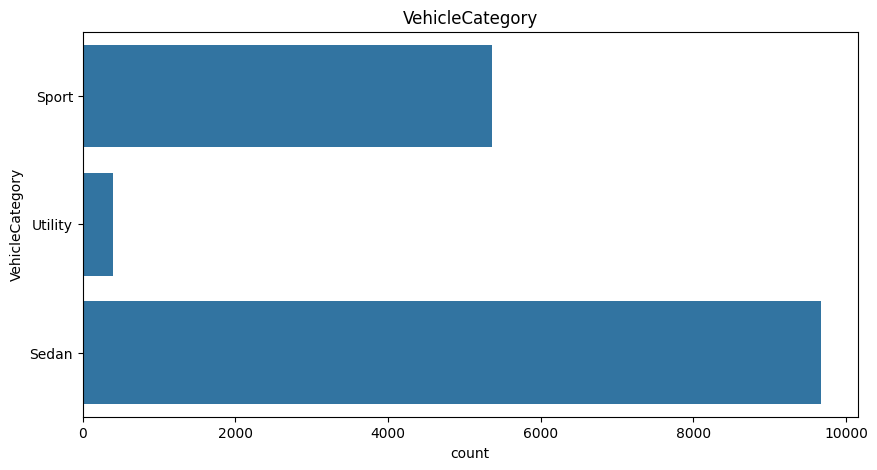

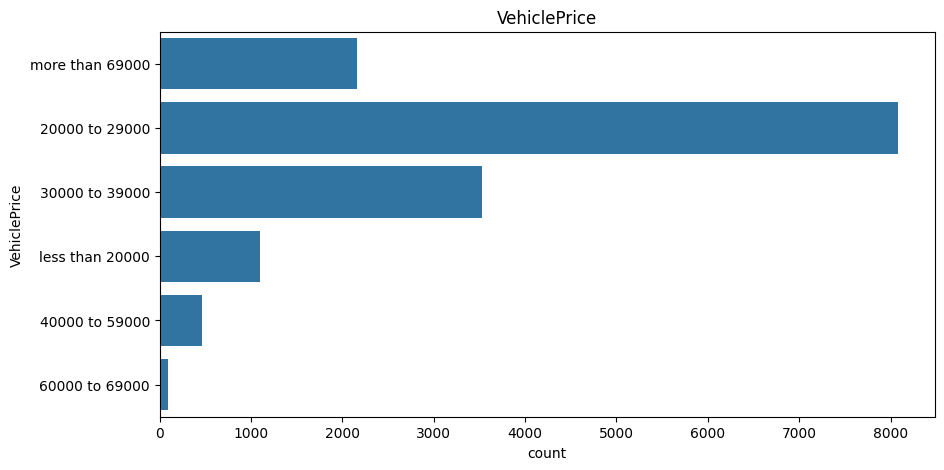

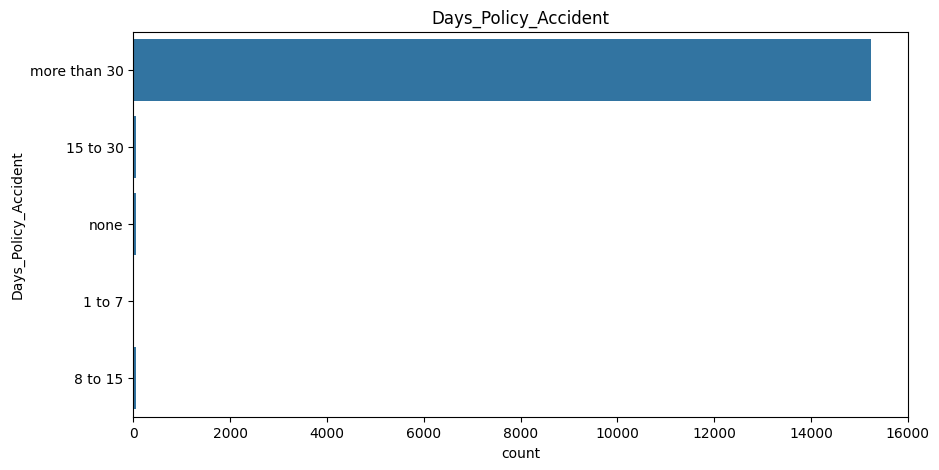

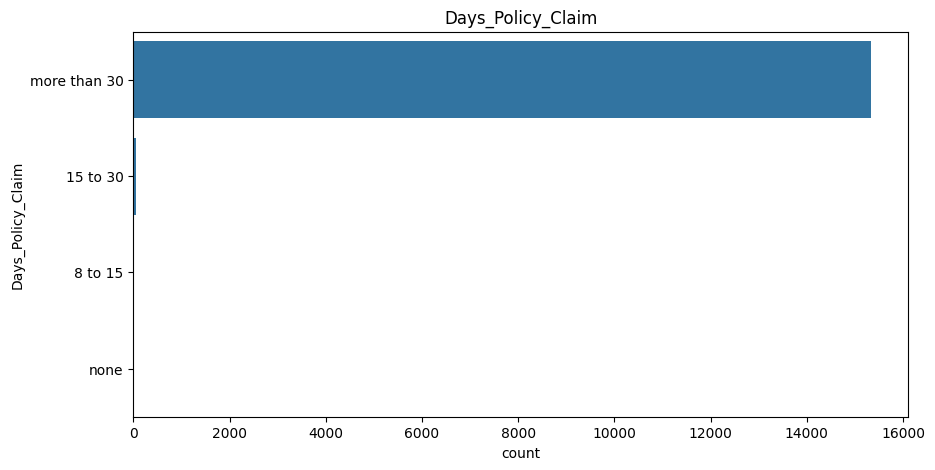

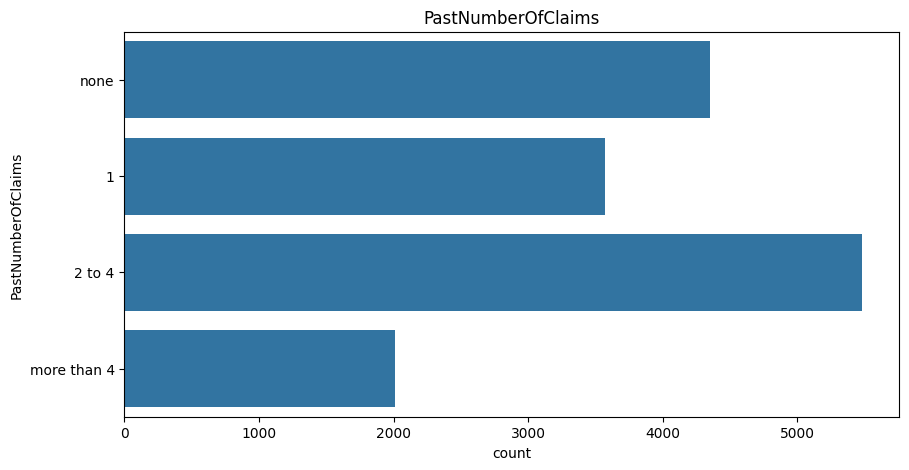

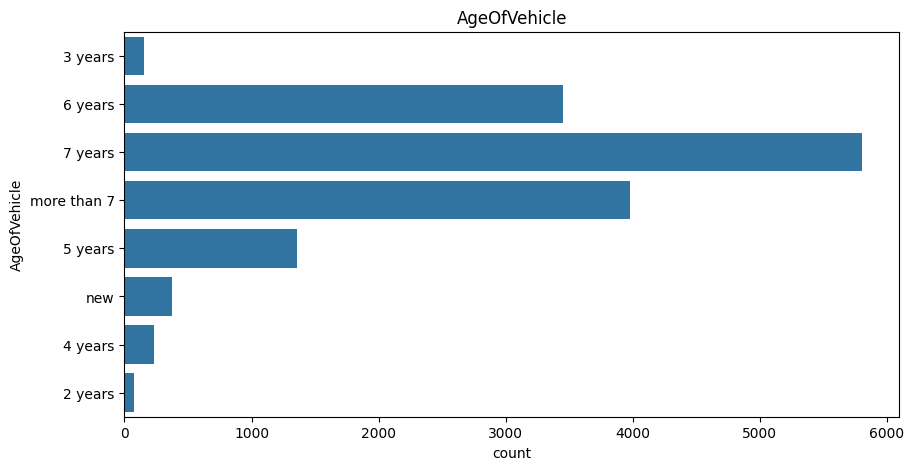

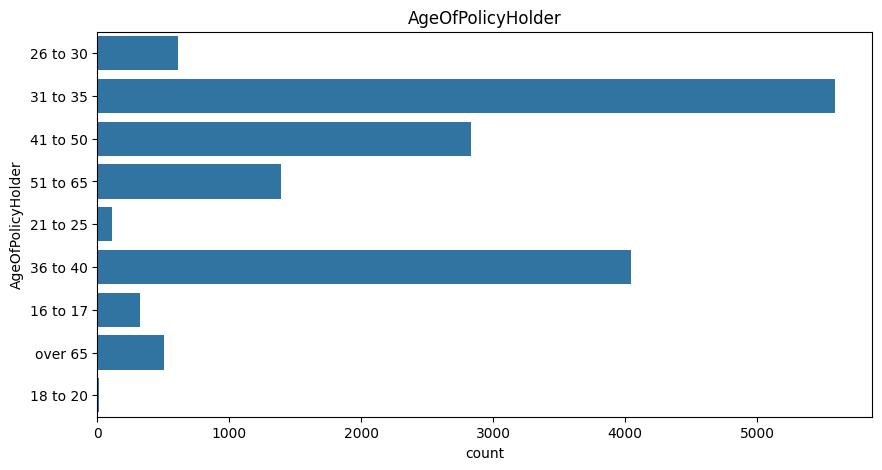

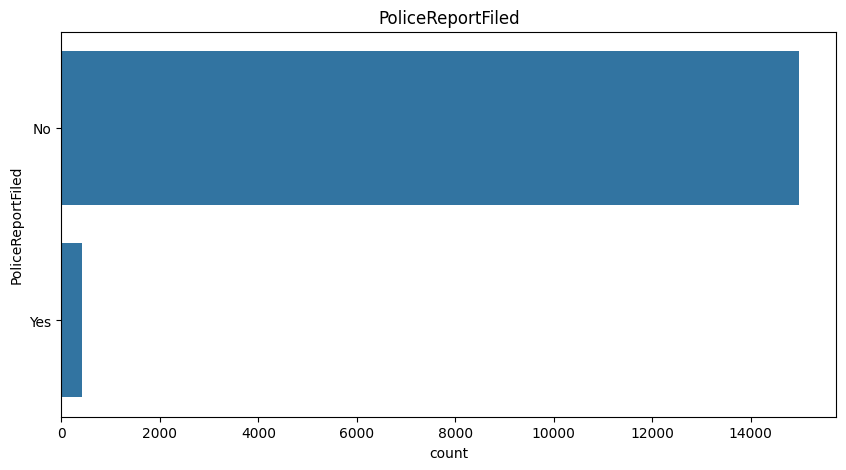

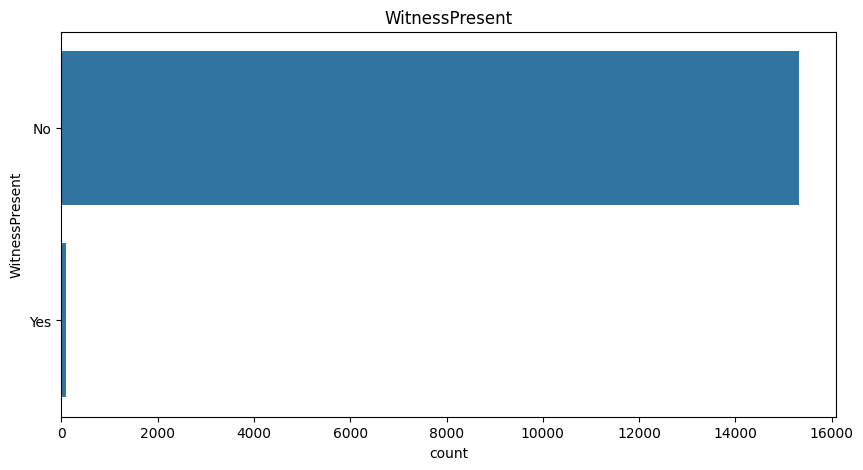

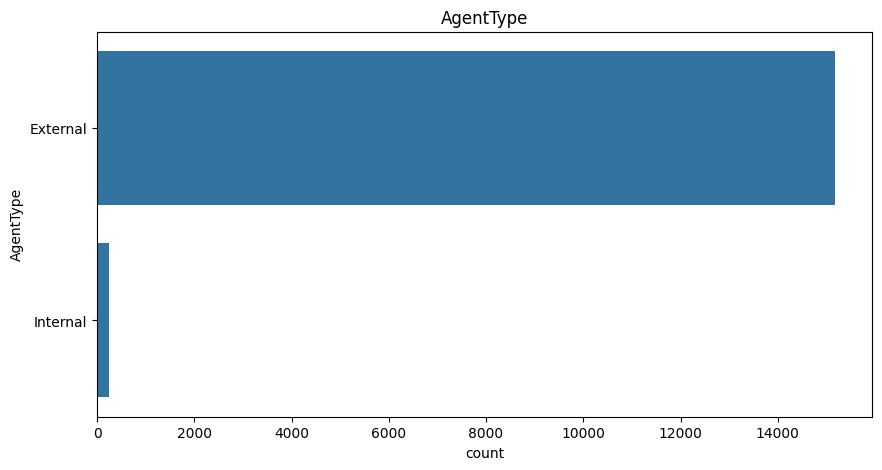

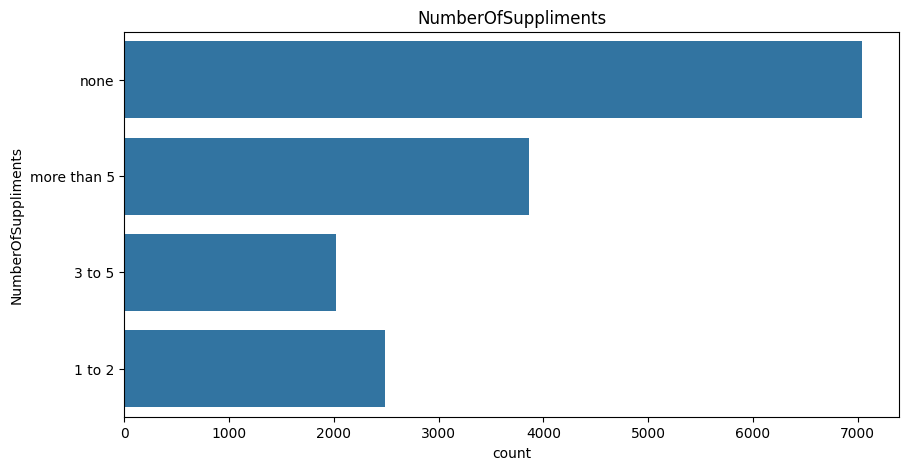

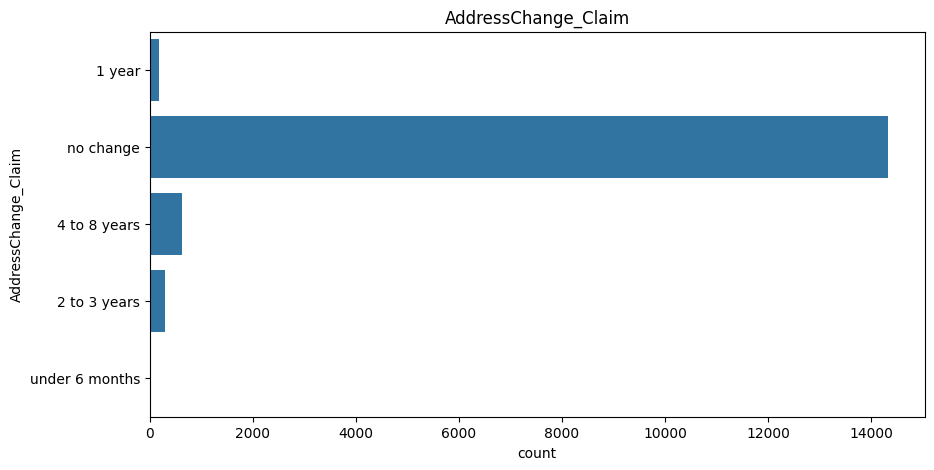

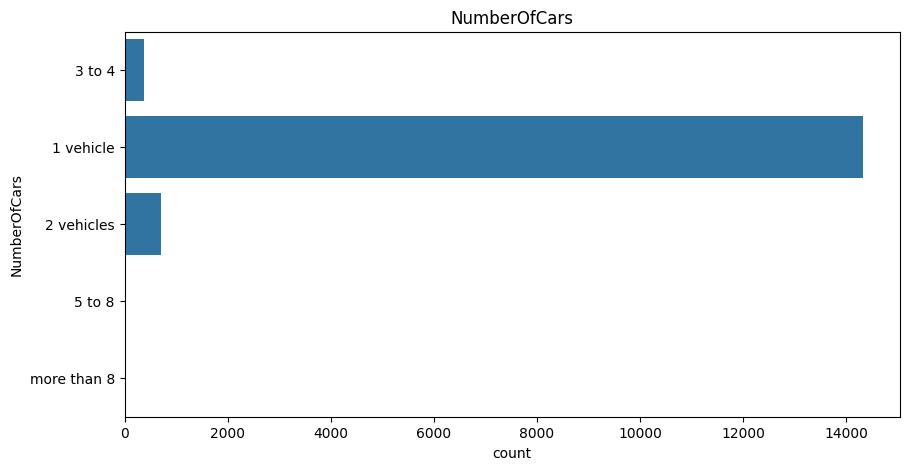

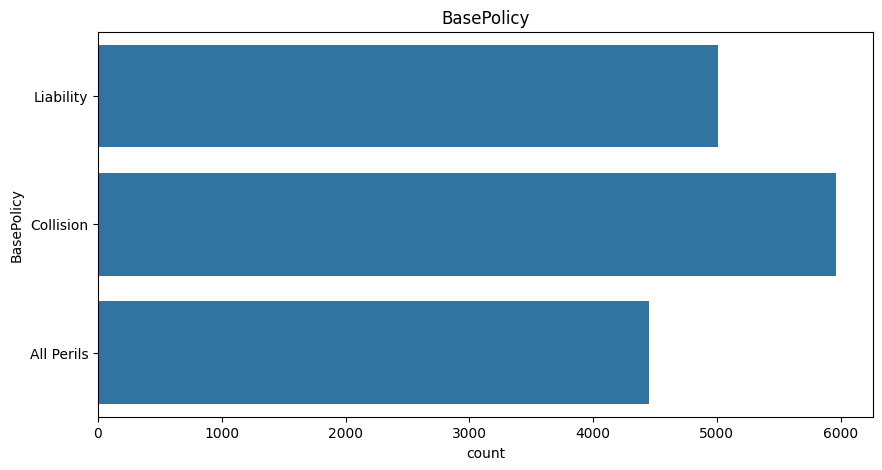

In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data[column])
    plt.title(column)
    plt.show()

In [ ]:
# Var vategoricas convertidas a true/false
data_encoded = pd.get_dummies(data, drop_first=True)

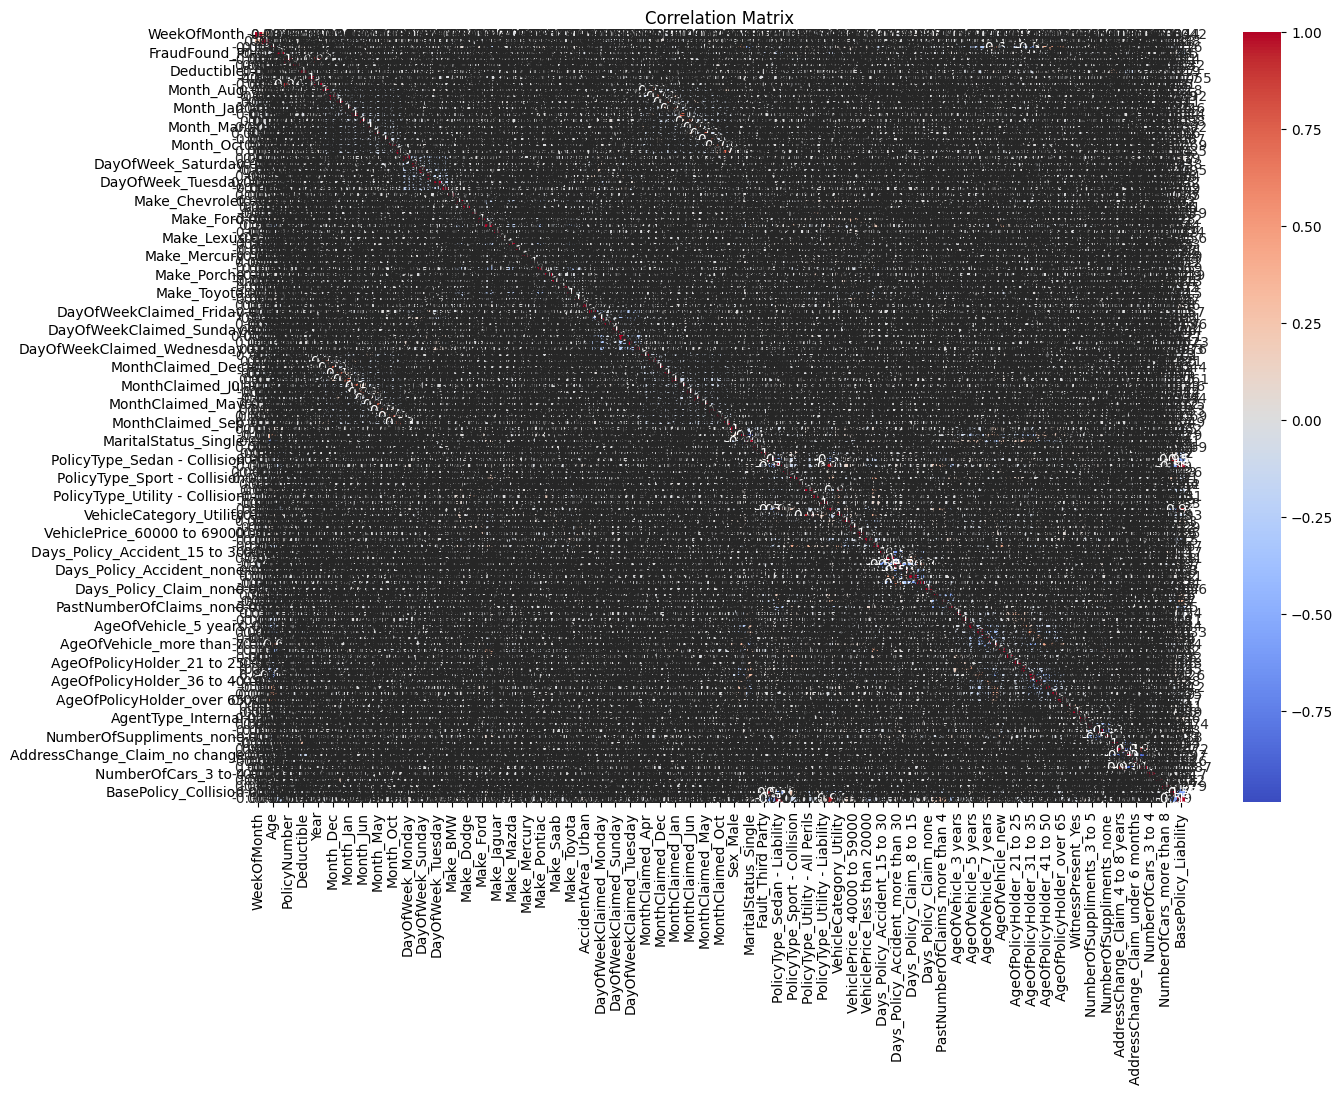

In [ ]:
# Matriz de correlación bruta, falla por la enorme cantidad de elementos, procediendo a depurar
correlation_matrix = data_encoded.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
data_reducida = data[['Make','AccidentArea','Age','Fault','PolicyType','VehicleCategory','VehiclePrice','FraudFound_P','DriverRating','PastNumberOfClaims','AgeOfVehicle','WitnessPresent']]

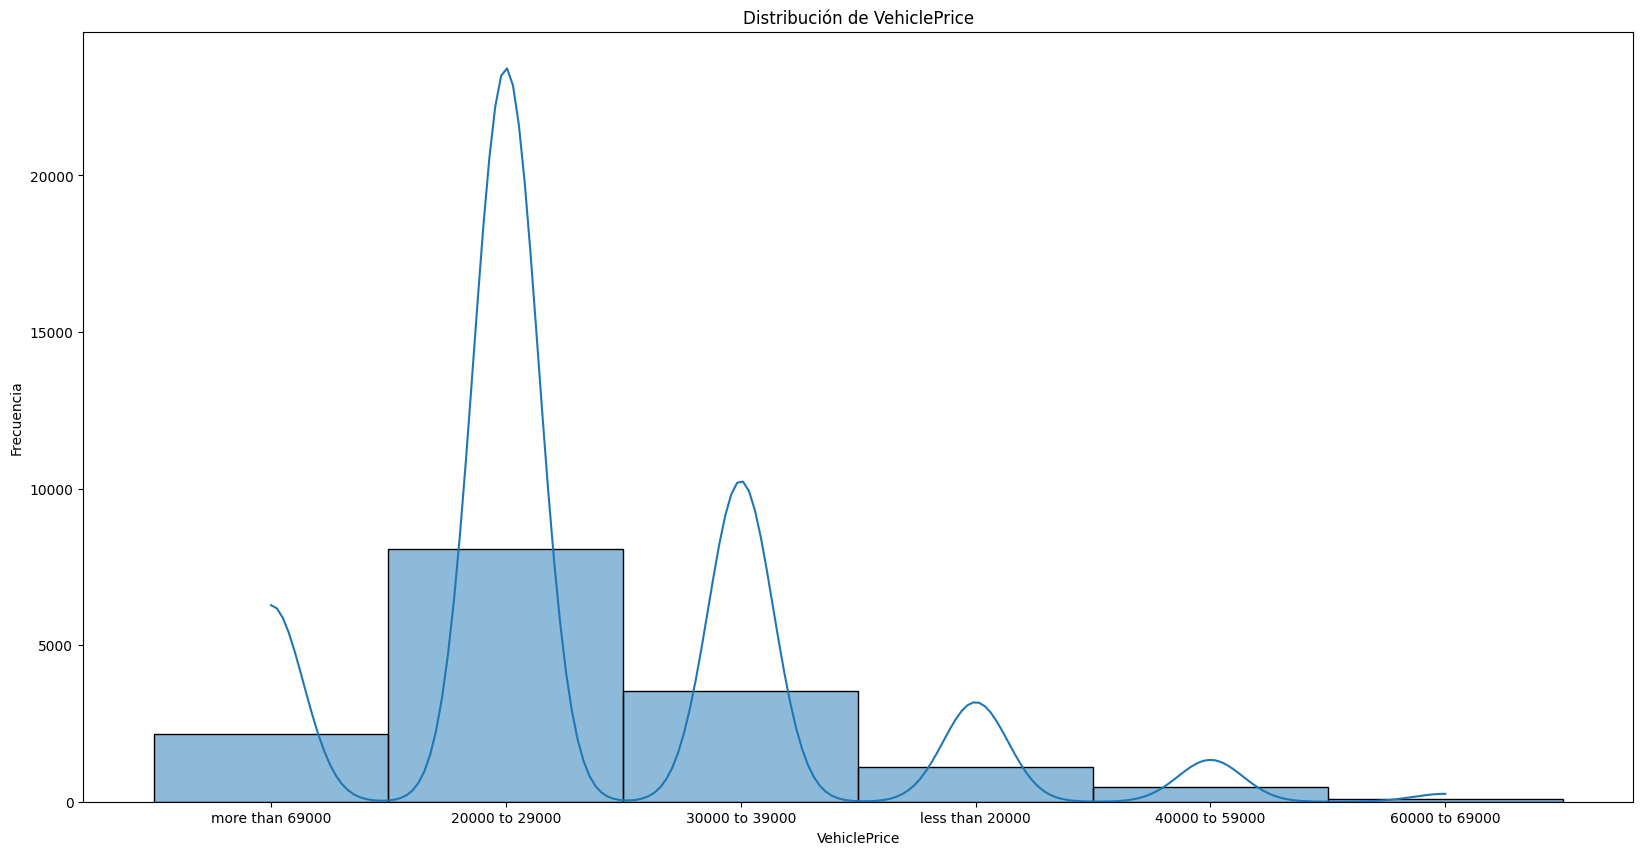

In [ ]:
# Visualizar la distribución de 'VehiclePrice'
plt.figure(figsize=(20, 10))
sns.histplot(data_reducida['VehiclePrice'], kde=True, bins=30)
plt.title('Distribución de VehiclePrice')
plt.xlabel('VehiclePrice')
plt.ylabel('Frecuencia')
plt.show()

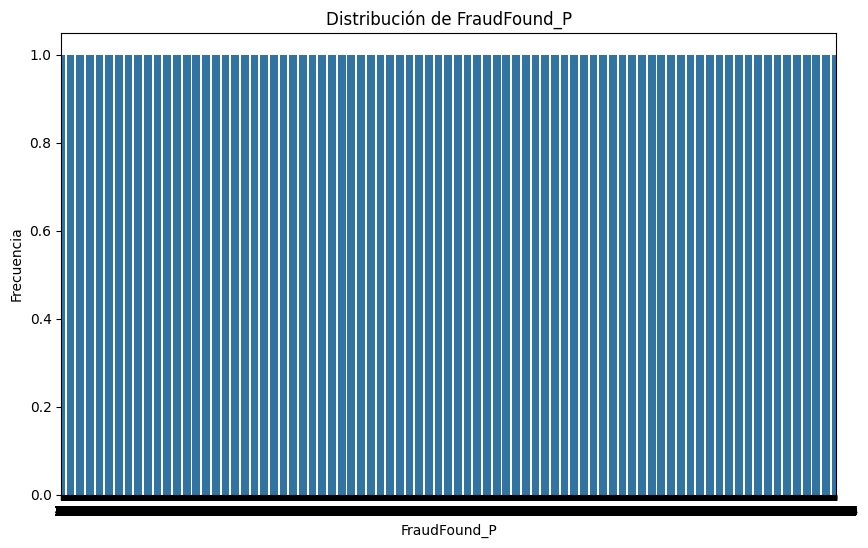

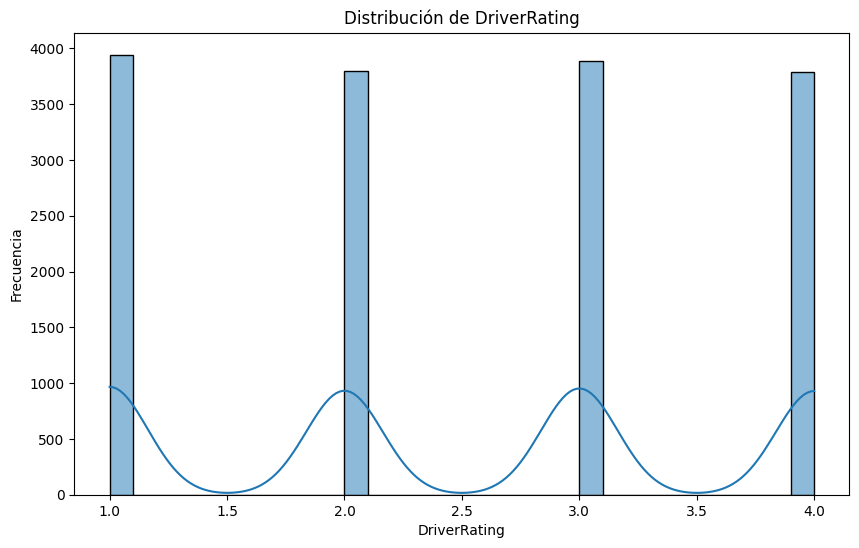

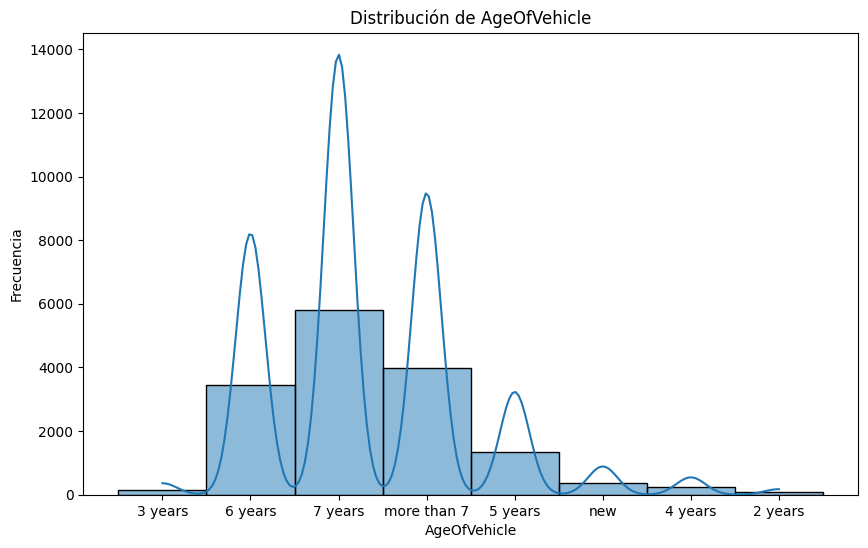

In [ ]:
# Graficos para conocer distribuciones de variables que me interesan
plt.figure(figsize=(10, 6))
sns.countplot(data_reducida['FraudFound_P'])
plt.title('Distribución de FraudFound_P')
plt.xlabel('FraudFound_P')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data_reducida['DriverRating'], kde=True, bins=30)
plt.title('Distribución de DriverRating')
plt.xlabel('DriverRating')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data_reducida['AgeOfVehicle'], kde=True, bins=30)
plt.title('Distribución de AgeOfVehicle')
plt.xlabel('AgeOfVehicle')
plt.ylabel('Frecuencia')
plt.show()

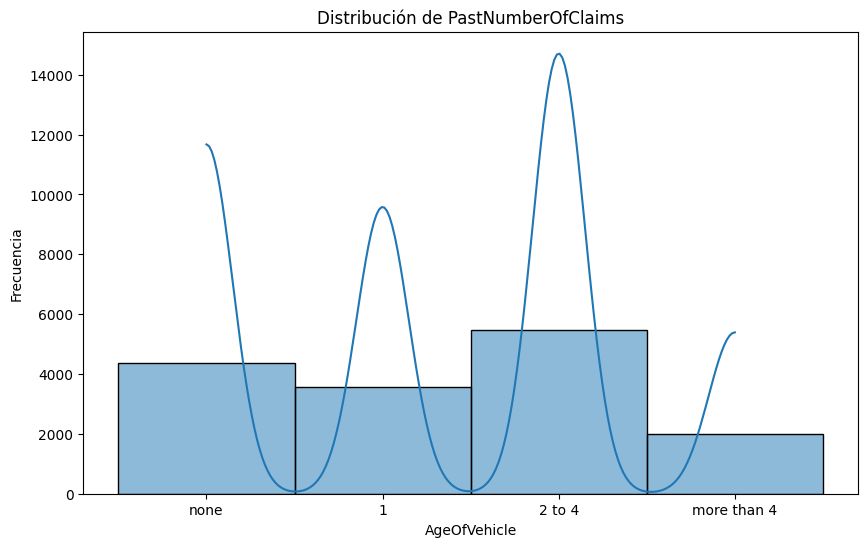

In [ ]:
# Reclamaciones pasadas por cliente
plt.figure(figsize=(10, 6))
sns.histplot(data_reducida['PastNumberOfClaims'], kde=True, bins=30)
plt.title('Distribución de PastNumberOfClaims')
plt.xlabel('AgeOfVehicle')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
price_mapping = {
    'more than 69000': 69000,
    'less than 20000': 20000,
    '20000 to 29000': (20000 + 29000) / 2,
    '30000 to 39000': (30000 + 39000) / 2,
    '40000 to 59000': (40000 + 59000) / 2,
    '60000 to 69000': (60000 + 69000) / 2
}

In [ ]:
# Crear la nueva columna con valores promedio
data_reducida['VehiclePriceAvg'] = data_reducida['VehiclePrice'].map(price_mapping)

In [ ]:
claims_mapping = {
    'none': 0,
    '1': 1,
    '2 to 4': (2 + 4) / 2,
    'more than 4': 5
}

In [ ]:
# Crear col con valores promedio
data_reducida['PastNumberOfClaimsAvg'] = data_reducida['PastNumberOfClaims'].map(claims_mapping)


In [ ]:
age_mapping = {
    'new': 0,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    'more than 7': 8
}

In [ ]:
# Crear col con valores numéricos
data_reducida['AgeOfVehicleNum'] = data_reducida['AgeOfVehicle'].map(age_mapping)

In [ ]:
data_reducida_cols = data_reducida[['AccidentArea','Age','PolicyType','VehicleCategory','FraudFound_P','DriverRating','WitnessPresent','VehiclePriceAvg','PastNumberOfClaimsAvg','AgeOfVehicleNum']]

In [ ]:
# Utilizando one hot nuevamente
data_encoded9 = pd.get_dummies(data_reducida_cols, drop_first=True)

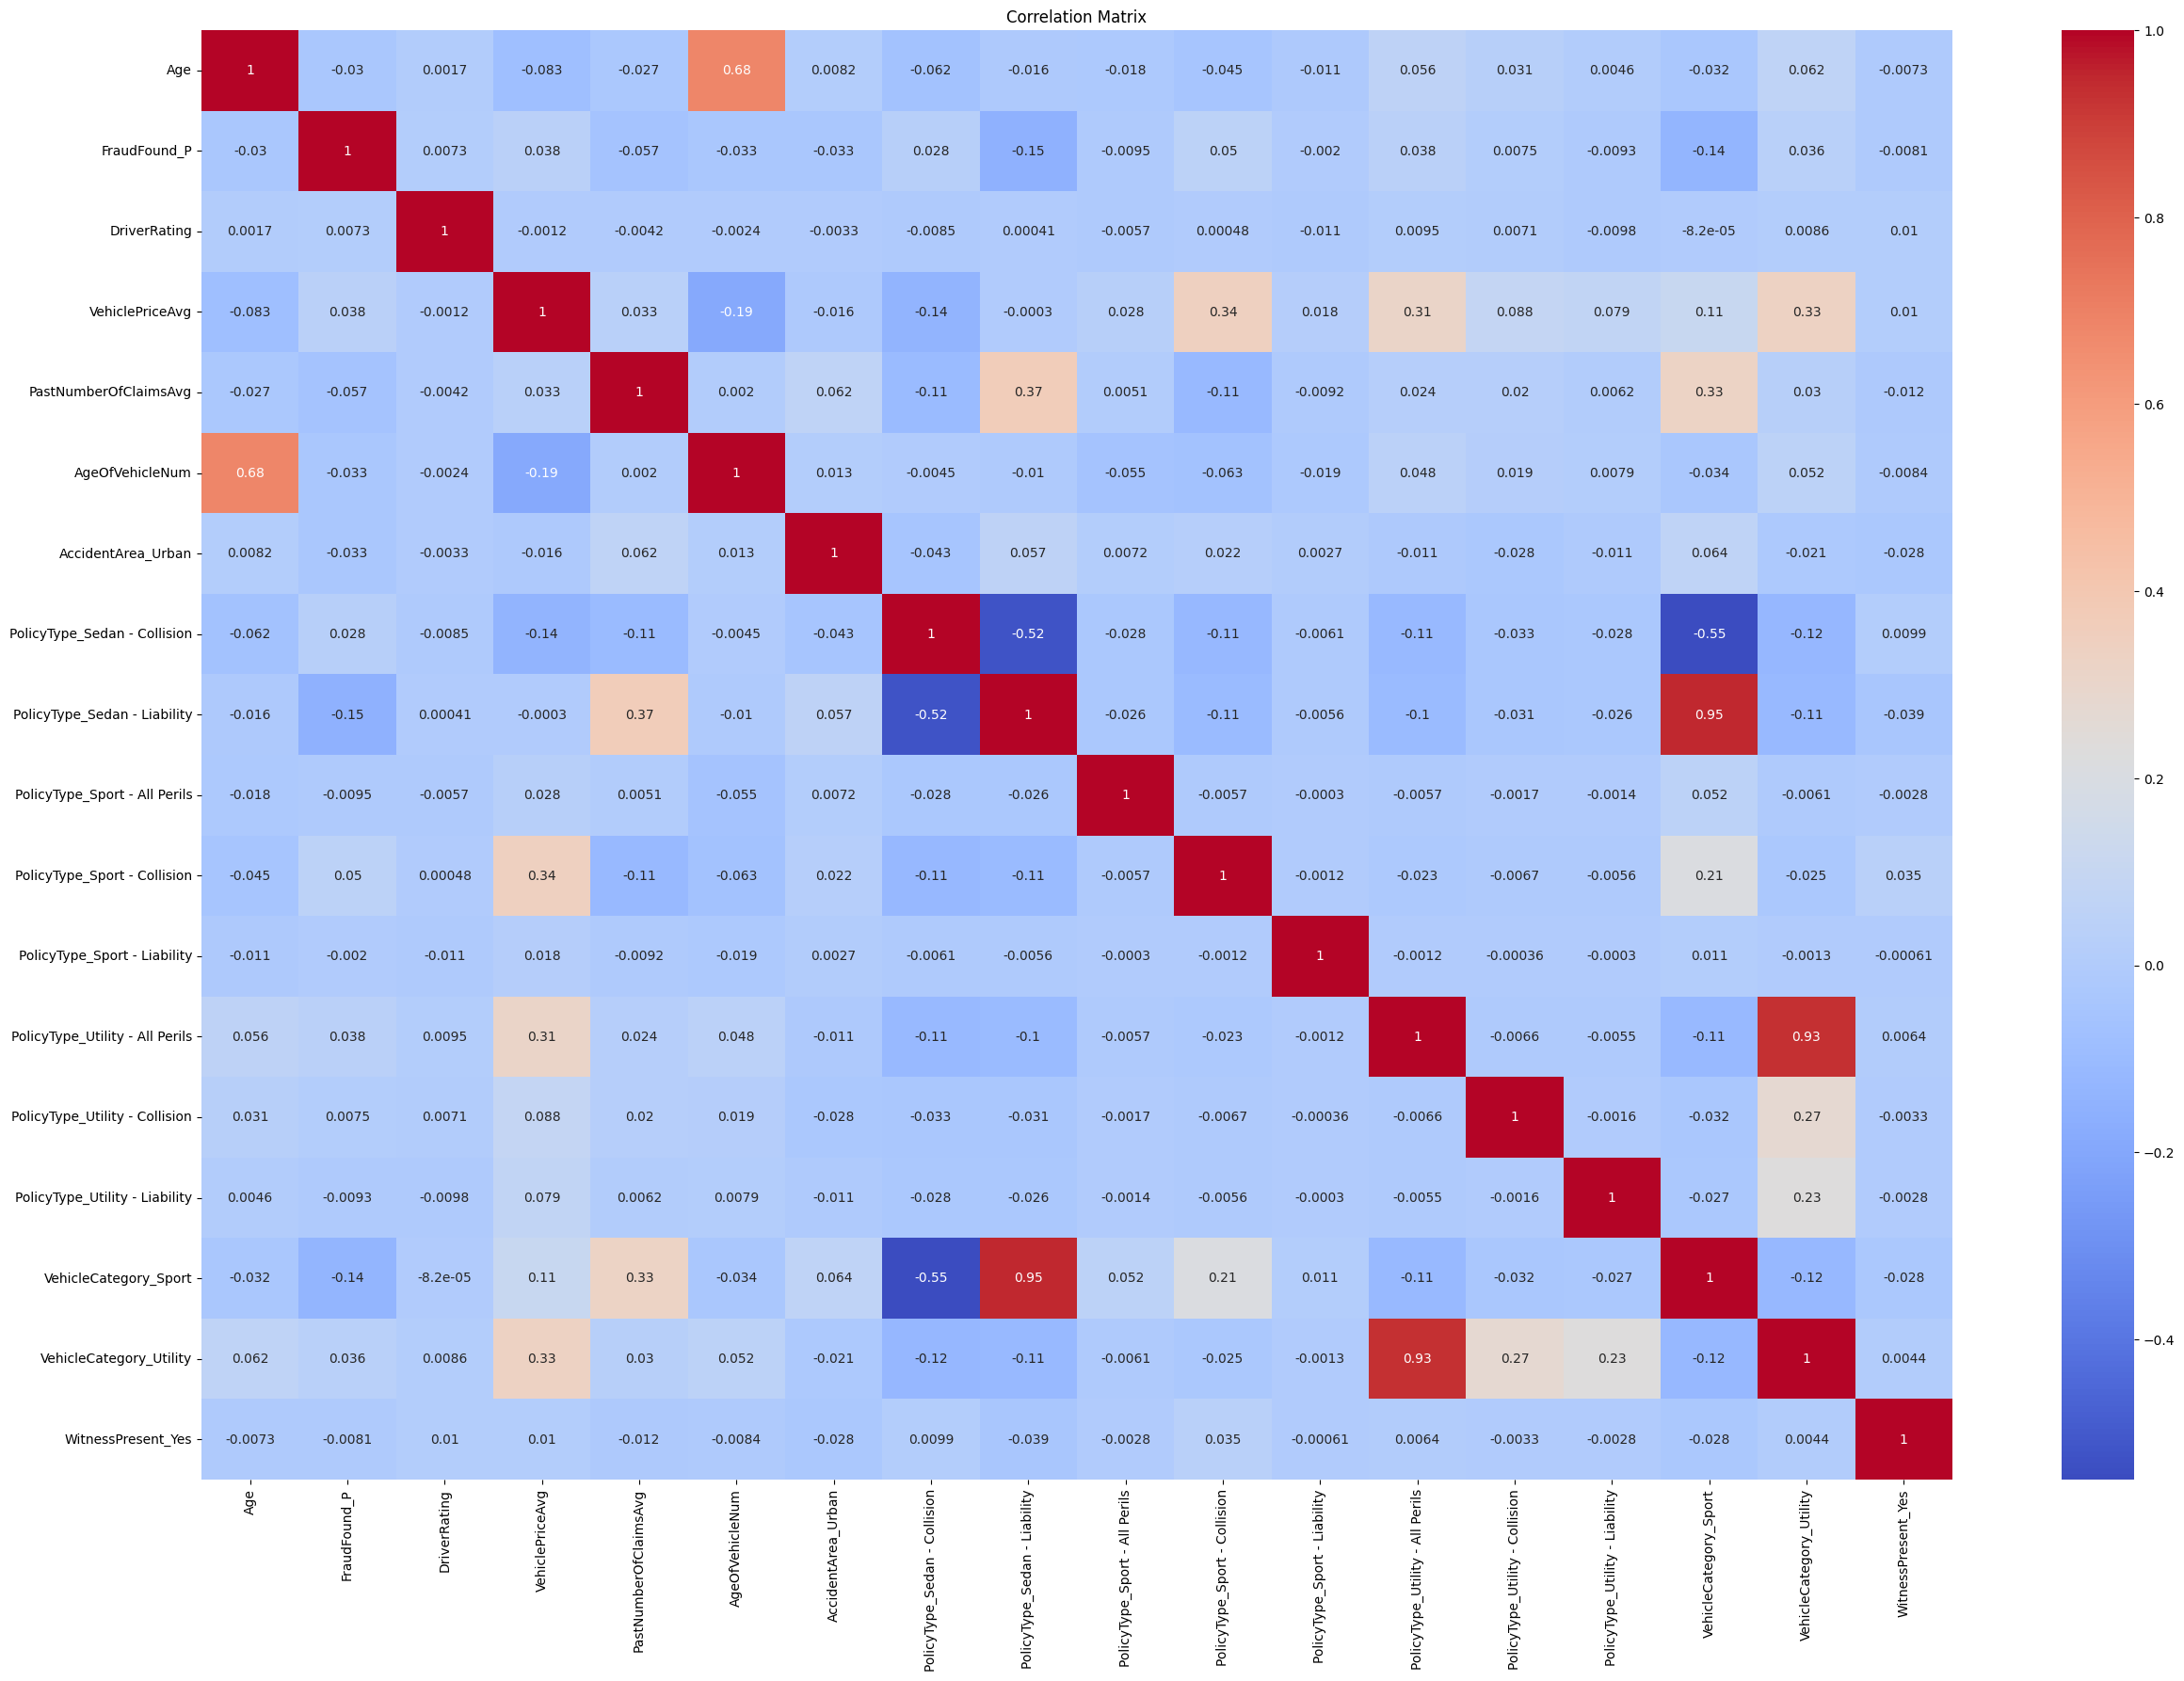

In [ ]:
# Nueva matriz de correlacion con posibilidad de visualización
correlation_matrix = data_encoded9.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Codificar variables categóricas
data_reducida_cols5 = pd.get_dummies(data_reducida_cols, columns=['AccidentArea', 'PolicyType', 'VehicleCategory', 'WitnessPresent'], drop_first=True)

# ver 5 datos de la data
data_reducida_cols5.head()

Age  FraudFound_P  DriverRating  VehiclePriceAvg  PastNumberOfClaimsAvg  \
0   21             0             1          69000.0                    0.0   
1   34             0             4          69000.0                    0.0   
2   47             0             3          69000.0                    1.0   
3   65             0             2          24500.0                    1.0   
4   27             0             1          69000.0                    0.0   

   AgeOfVehicleNum  AccidentArea_Urban  PolicyType_Sedan - Collision  \
0                3                True                         False   
1                6                True                         False   
2                7                True                         False   
3                8               False                         False   
4                5                True                         False   

   PolicyType_Sedan - Liability  PolicyType_Sport - All Perils  \
0                         False                          False   
1                         False                          False   
2                         False                          False   
3                          True                          False   
4                         False                          False   

   PolicyType_Sport - Collision  PolicyType_Sport - Liability  \
0                         False                          True   
1                          True                         False   
2                          True                         False   
3                         False                         False   
4                          True                         False   

   PolicyType_Utility - All Perils  PolicyType_Utility - Collision  \
0                            False                           False   
1                            False                           False   
2                            False                           False   
3                            False                           False   
4                            False                           False   

   PolicyType_Utility - Liability  VehicleCategory_Sport  \
0                           False                   True   
1                           False                   True   
2                           False                   True   
3                           False                   True   
4                           False                   True   

   VehicleCategory_Utility  WitnessPresent_Yes  
0                    False               False  
1                    False               False  
2                    False               False  
3                    False               False  
4                    False               False

In [ ]:
# Separar las características (X) y la variable objetivo (y)
X = data_reducida_cols5.drop('FraudFound_P', axis=1)
y = data_reducida_cols5['FraudFound_P']

In [ ]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Crear y entrenar el modelo
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Realizar predicciones
y_pred = clf.predict(X_test)

In [ ]:
# Evaluación del modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

[[4144  197]
 [ 265   20]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      4341
           1       0.09      0.07      0.08       285

    accuracy                           0.90      4626
   macro avg       0.52      0.51      0.51      4626
weighted avg       0.89      0.90      0.89      4626

Accuracy: 0.9001297016861219


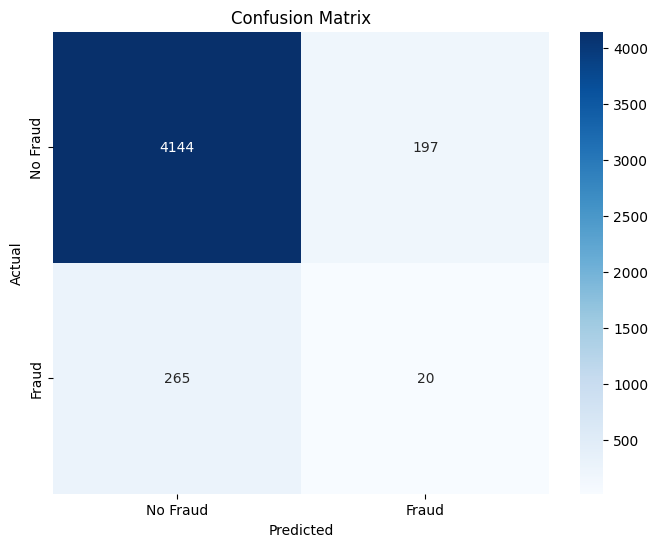

In [ ]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


RandomForestClassifier
[[4121  220]
 [ 257   28]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      4341
           1       0.11      0.10      0.11       285

    accuracy                           0.90      4626
   macro avg       0.53      0.52      0.53      4626
weighted avg       0.89      0.90      0.89      4626

Accuracy: 0.896887159533074


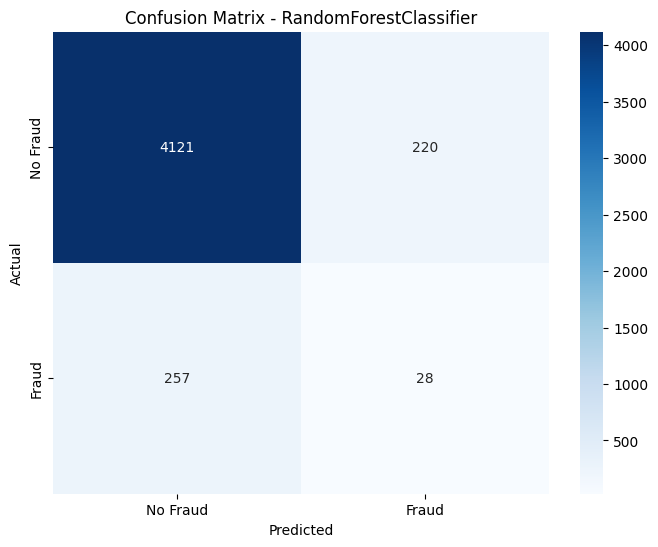

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Crear y entrenar el modelo
rf_clf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_clf.fit(X_train, y_train)

# Realizar predicciones
y_pred_rf = rf_clf.predict(X_test)

# Evaluación del modelo
print("RandomForestClassifier")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print('Accuracy:', accuracy_score(y_test, y_pred_rf))

# Visualizar la matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - RandomForestClassifier')
plt.show()

XGBoostClassifier
[[3396  945]
 [ 180  105]]
              precision    recall  f1-score   support

           0       0.95      0.78      0.86      4341
           1       0.10      0.37      0.16       285

    accuracy                           0.76      4626
   macro avg       0.52      0.58      0.51      4626
weighted avg       0.90      0.76      0.81      4626

Accuracy: 0.7568093385214008


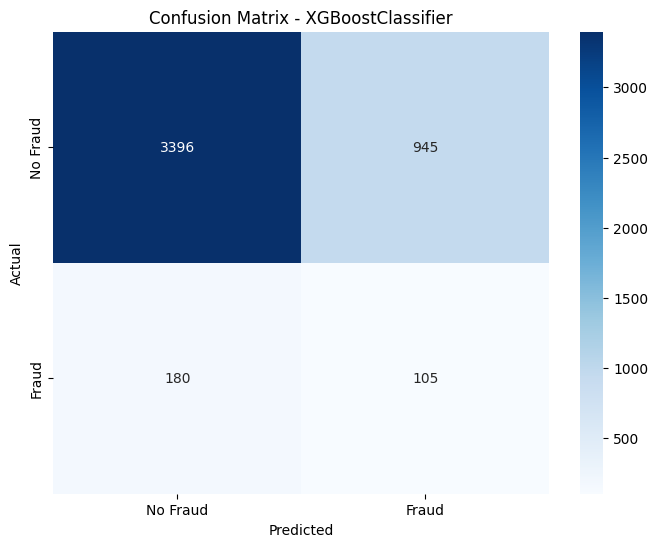

In [ ]:
from xgboost import XGBClassifier

# Crear y entrenar el modelo
xgb_clf = XGBClassifier(random_state=42, scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
xgb_clf.fit(X_train, y_train)

# Realizar predicciones
y_pred_xgb = xgb_clf.predict(X_test)

# Evaluación del modelo
print("XGBoostClassifier")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print('Accuracy:', accuracy_score(y_test, y_pred_xgb))

# Visualizar la matriz de confusión
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoostClassifier')
plt.show()

In [ ]:
datanew = data[['Make','AccidentArea','Sex','MaritalStatus','Age','Fault','PolicyType','VehicleCategory','VehiclePrice','FraudFound_P','Deductible','DriverRating','PastNumberOfClaims','AgeOfVehicle','AgeOfPolicyHolder','PoliceReportFiled','NumberOfSuppliments','AddressChange_Claim','NumberOfCars','BasePolicy']]

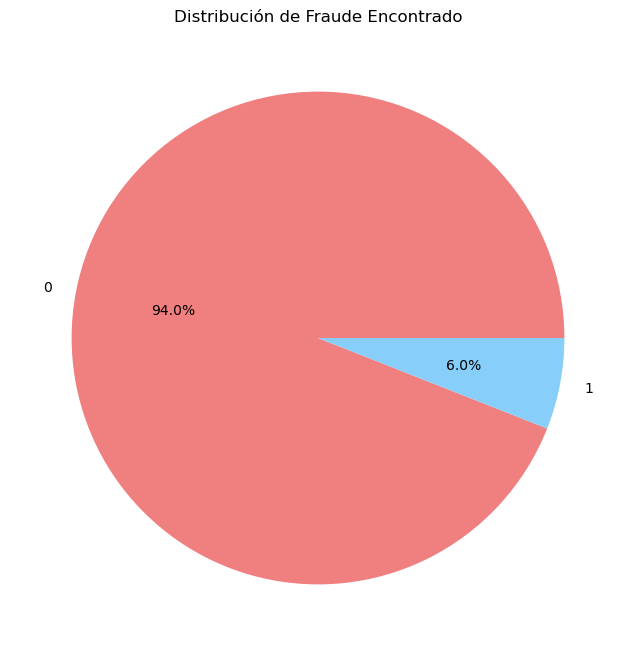

In [ ]:
# Contar la frecuencia de cada valor en 'FraudFound_P'
fraud_counts = data['FraudFound_P'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Distribución de Fraude Encontrado')
plt.show()

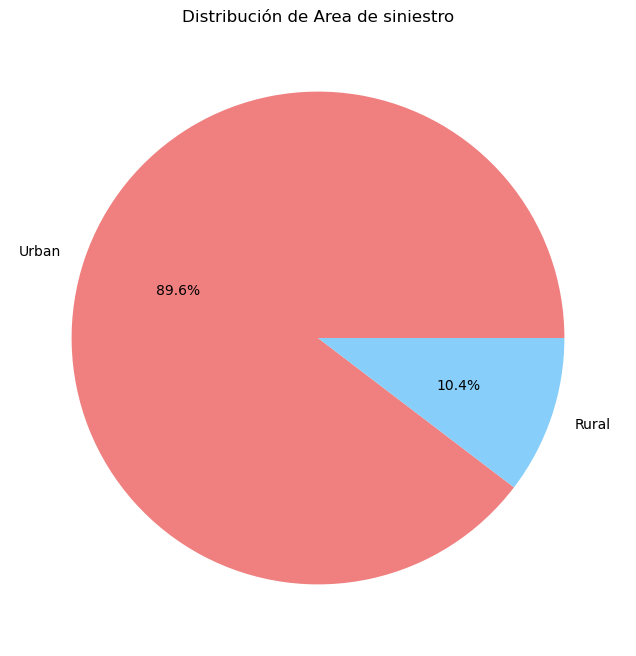

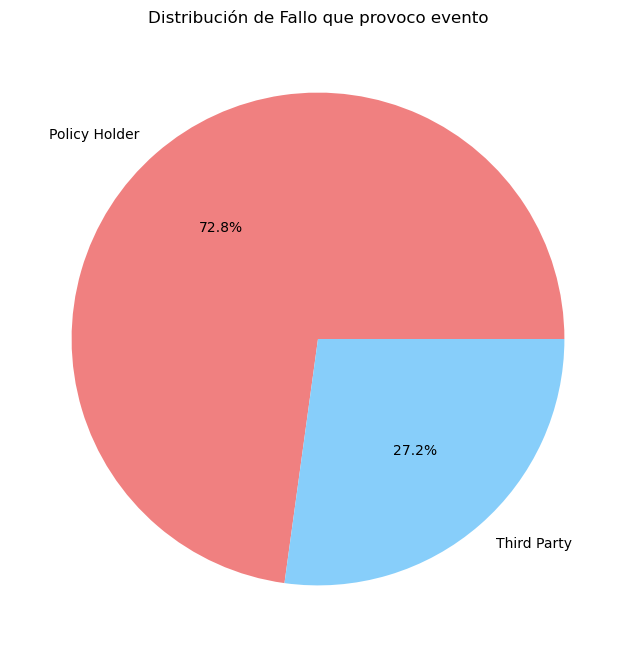

In [ ]:
fraud_counts = data['AccidentArea'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Distribución de Area de siniestro')
plt.show()
# Contar la frecuencia de cada valor en 'FraudFound_P'
fraud_counts = data['Fault'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Distribución de Fallo que provoco evento')
plt.show()

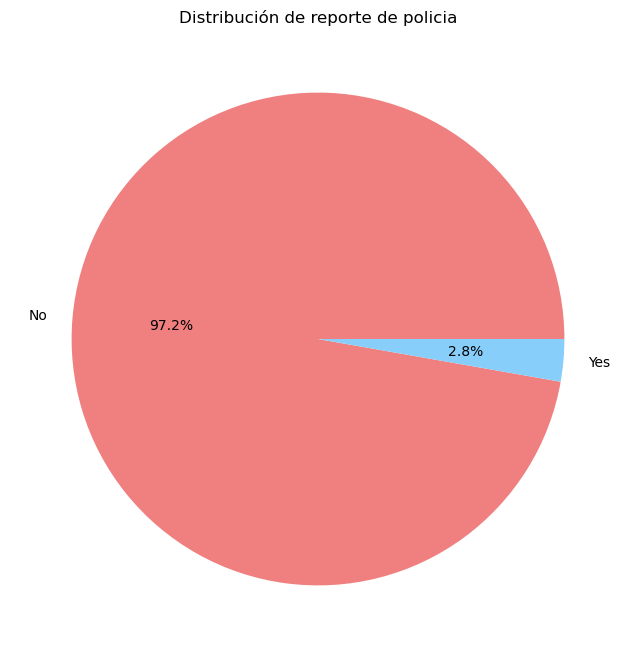

In [ ]:
# Contar la frecuencia de cada valor en 'FraudFound_P'
fraud_counts = data['PoliceReportFiled'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Distribución de reporte de policia')
plt.show()

In [ ]:
var_cat_1_0 = ['AccidentArea','Fault','PoliceReportFiled']

In [ ]:
# Mapeo de los valores categóricos a 0 y 1
mapping = {
    'AccidentArea': {'Urban': 1, 'Rural': 0},
    'Fault': {'Policy Holder': 1, 'Third Party': 0},
    'PoliceReportFiled': {'Yes': 1, 'No': 0},
}

In [ ]:
# Aplicar el mapeo a las columnas correspondientes
for col in var_cat_1_0:
    datanew[col] = datanew[col].map(mapping[col])


In [ ]:
# Crear una copia del DataFrame original para no modificarlo, siempre trabajo con copia de datos no los originales
datanew_binary = datanew.copy()
columns_to_encode = [col for col in datanew_binary.columns if col not in var_cat_1_0 + ['FraudFound_P']]
datanew_encoded = pd.get_dummies(datanew_binary, columns=columns_to_encode, drop_first=True)
X = datanew_encoded.drop('FraudFound_P', axis=1)
y = datanew_encoded['FraudFound_P']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Manejar los valores faltantes utilizando SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [ ]:
# Entrenar el modelo de Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_imputed, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf.predict(X_test_imputed)

In [ ]:
# Evaluar el rendimiento del modelo
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[4334    7]
 [ 280    5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4341
           1       0.42      0.02      0.03       285

    accuracy                           0.94      4626
   macro avg       0.68      0.51      0.50      4626
weighted avg       0.91      0.94      0.91      4626


Accuracy Score:
0.9379593601383485


In [ ]:
# Afinar el modelo aqui busco cuales son los mejores hiper parametros a ver como funcionan
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10, 12, None],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

In [ ]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_imputed, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced',
                                          'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 12, None],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=2)

In [ ]:
# Entrenar el modelo de Random Forest con los mejores parámetros
best_rf = grid_search.best_estimator_
best_rf.fit(X_train_imputed, y_train)

RandomForestClassifier(max_depth=12, random_state=42)

In [ ]:
# nuevas predicciones
y_pred_best = best_rf.predict(X_test_imputed)

In [ ]:
# No funciono muy bien
print("\nConfusion Matrix (Best Model):")
print(confusion_matrix(y_test, y_pred_best))
print("\nClassification Report (Best Model):")
print(classification_report(y_test, y_pred_best))
print("\nAccuracy Score (Best Model):")
print(accuracy_score(y_test, y_pred_best))


Confusion Matrix (Best Model):
[[4341    0]
 [ 282    3]]

Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4341
           1       1.00      0.01      0.02       285

    accuracy                           0.94      4626
   macro avg       0.97      0.51      0.49      4626
weighted avg       0.94      0.94      0.91      4626


Accuracy Score (Best Model):
0.9390402075226978


In [ ]:
#A partir de aqui realizare una fuerte reutilizacion de codigo pues vamos a cambiar entre modelos y redes neuronales
datanew_binary = datanew.copy()
columns_to_encode = [col for col in datanew_binary.columns if col not in var_cat_1_0 + ['FraudFound_P']]
datanew_encoded = pd.get_dummies(datanew_binary, columns=columns_to_encode, drop_first=True)
X = datanew_encoded.drop('FraudFound_P', axis=1)
y = datanew_encoded['FraudFound_P']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

for name, clf in classifiers.items():
    # Crear un pipeline que incluye escalado y el clasificador
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', clf)
    ])

    pipeline.fit(X_train_imputed, y_train)

    y_pred = pipeline.predict(X_test_imputed)

    print(f"Classifier: {name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nAccuracy Score:")
    print(accuracy_score(y_test, y_pred))
    print("-" * 60)


Classifier: Logistic Regression
Confusion Matrix:
[[4336    5]
 [ 283    2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4341
           1       0.29      0.01      0.01       285

    accuracy                           0.94      4626
   macro avg       0.61      0.50      0.49      4626
weighted avg       0.90      0.94      0.91      4626


Accuracy Score:
0.9377431906614786
------------------------------------------------------------
Classifier: Decision Tree
Confusion Matrix:
[[4118  223]
 [ 237   48]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4341
           1       0.18      0.17      0.17       285

    accuracy                           0.90      4626
   macro avg       0.56      0.56      0.56      4626
weighted avg       0.90      0.90      0.90      4626


Accuracy Score:
0.9005620406398617
-----------------

In [ ]:
# Definir la estrategia de balanceo y el clasificador
smote = SMOTE(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('classifier', decision_tree)
])
param_grid = {
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 10, 20],
    'classifier__min_samples_leaf': [1, 5, 10],
    'classifier__class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)
grid_search.fit(X_train_imputed, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

y_pred_best = best_model.predict(X_test_imputed)

print("Confusion Matrix (Best Model):")
print(confusion_matrix(y_test, y_pred_best))
print("\nClassification Report (Best Model):")
print(classification_report(y_test, y_pred_best))
print("\nAccuracy Score (Best Model):")
print(accuracy_score(y_test, y_pred_best))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'classifier__class_weight': None, 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10}
Confusion Matrix (Best Model):
[[4029  312]
 [ 204   81]]

Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      4341
           1       0.21      0.28      0.24       285

    accuracy                           0.89      4626
   macro avg       0.58      0.61      0.59      4626
weighted avg       0.91      0.89      0.90      4626


Accuracy Score (Best Model):
0.8884565499351491


In [ ]:
smote = SMOTE(random_state=42)
naive_bayes = GaussianNB()

pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('classifier', naive_bayes)
])

pipeline.fit(X_train_imputed, y_train)

y_pred_nb = pipeline.predict(X_test_imputed)

print("Confusion Matrix (Naive Bayes with SMOTE):")
print(confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report (Naive Bayes with SMOTE):")
print(classification_report(y_test, y_pred_nb))
print("\nAccuracy Score (Naive Bayes with SMOTE):")
print(accuracy_score(y_test, y_pred_nb))

Confusion Matrix (Naive Bayes with SMOTE):
[[ 287 4054]
 [  14  271]]

Classification Report (Naive Bayes with SMOTE):
              precision    recall  f1-score   support

           0       0.95      0.07      0.12      4341
           1       0.06      0.95      0.12       285

    accuracy                           0.12      4626
   macro avg       0.51      0.51      0.12      4626
weighted avg       0.90      0.12      0.12      4626


Accuracy Score (Naive Bayes with SMOTE):
0.12062256809338522


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

datanew_binary = datanew.copy()

columns_to_encode = [col for col in datanew_binary.columns if col not in var_cat_1_0 + ['FraudFound_P']]
datanew_encoded = pd.get_dummies(datanew_binary, columns=columns_to_encode, drop_first=True)

X = datanew_encoded.drop('FraudFound_P', axis=1)
y = datanew_encoded['FraudFound_P']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

smote = SMOTE(random_state=42)

# Definir los clasificadores base para el VotingClassifier
clf1 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=10000, random_state=42))
])

clf2 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=42, class_weight='balanced'))
])

clf3 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

clf4 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

clf5 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GaussianNB())
])

clf6 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', AdaBoostClassifier(random_state=42))
])

# Crear el VotingClassifier con SMOTE
voting_clf = ImbPipeline([
    ('smote', smote),
    ('voting', VotingClassifier(estimators=[
        ('lr', clf1),
        ('dt', clf2),
        ('rf', clf3),
        ('gb', clf4),
        ('nb', clf5),
        ('ada', clf6)
    ], voting='soft'))
])

voting_clf.fit(X_train_imputed, y_train)

y_pred_voting = voting_clf.predict(X_test_imputed)

print("Confusion Matrix (Voting Classifier):")
print(confusion_matrix(y_test, y_pred_voting))
print("\nClassification Report (Voting Classifier):")
print(classification_report(y_test, y_pred_voting))
print("\nAccuracy Score (Voting Classifier):")
print(accuracy_score(y_test, y_pred_voting))


Confusion Matrix (Voting Classifier):
[[4000  341]
 [ 195   90]]

Classification Report (Voting Classifier):
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      4341
           1       0.21      0.32      0.25       285

    accuracy                           0.88      4626
   macro avg       0.58      0.62      0.59      4626
weighted avg       0.91      0.88      0.89      4626


Accuracy Score (Voting Classifier):
0.8841331603977518


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

datanew_binary = datanew.copy()

columns_to_encode = [col for col in datanew_binary.columns if col not in var_cat_1_0 + ['FraudFound_P']]
datanew_encoded = pd.get_dummies(datanew_binary, columns=columns_to_encode, drop_first=True)

X = datanew_encoded.drop('FraudFound_P', axis=1)
y = datanew_encoded['FraudFound_P']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

smote = SMOTE(random_state=42)

clf1 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=10000, random_state=42))
])

clf2 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=42, class_weight='balanced'))
])

clf3 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

clf4 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

clf5 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GaussianNB())
])

clf6 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', AdaBoostClassifier(random_state=42))
])

clf7 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

clf8 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LGBMClassifier(random_state=42))
])

voting_clf = ImbPipeline([
    ('smote', smote),
    ('voting', VotingClassifier(estimators=[
        ('lr', clf1),
        ('dt', clf2),
        ('rf', clf3),
        ('gb', clf4),
        ('nb', clf5),
        ('ada', clf6),
        ('xgb', clf7),
        ('lgbm', clf8)
    ], voting='soft'))
])

param_grid = {
    'voting__lr__classifier__C': [0.1, 1.0, 10],
    'voting__dt__classifier__max_depth': [None, 10, 20, 30],
    'voting__rf__classifier__n_estimators': [100, 200, 300],
    'voting__gb__classifier__learning_rate': [0.01, 0.1, 0.2],
    'voting__ada__classifier__n_estimators': [50, 100, 200],
    'voting__xgb__classifier__learning_rate': [0.01, 0.1, 0.2],
    'voting__lgbm__classifier__learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(voting_clf, param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=2)
grid_search.fit(X_train_imputed, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

y_pred_best = best_model.predict(X_test_imputed)

print("Confusion Matrix (Best Voting Classifier):")
print(confusion_matrix(y_test, y_pred_best))
print("\nClassification Report (Best Voting Classifier):")
print(classification_report(y_test, y_pred_best))
print("\nAccuracy Score (Best Voting Classifier):")
print(accuracy_score(y_test, y_pred_best))


Fitting 3 folds for each of 2916 candidates, totalling 8748 fits
[LightGBM] [Info] Number of positive: 10156, number of negative: 10156
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 16760
[LightGBM] [Info] Number of data points in the train set: 20312, number of used features: 127
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best Parameters: {'voting__ada__classifier__n_estimators': 100, 'voting__dt__classifier__max_depth': 30, 'voting__gb__classifier__learning_rate': 0.01, 'voting__lgbm__classifier__learning_rate': 0.01, 'voting__lr__classifier__C': 10, 'voting__rf__classifier__n_estimators': 300, 'voting__xgb__classifier__learning_rate': 0.01}
Confusion Matrix (Best Voting Classifier):
[[3665  676]
 [ 133  152]]

Classification Report (Best Voti

In [ ]:
datanew_binary = datanew.copy()

columns_to_encode = [col for col in datanew_binary.columns if col not in var_cat_1_0 + ['FraudFound_P']]
datanew_encoded = pd.get_dummies(datanew_binary, columns=columns_to_encode, drop_first=True)

X = datanew_encoded.drop('FraudFound_P', axis=1)
y = datanew_encoded['FraudFound_P']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Definir la arquitectura de la red neuronal
model = Sequential()
model.add(Dense(128, input_dim=X_train_resampled.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
# Entrenar el modelo
history = model.fit(
    X_train_resampled, y_train_resampled,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=2
)

Epoch 1/100
635/635 - 3s - 4ms/step - accuracy: 0.6396 - loss: 0.6338 - val_accuracy: 0.6552 - val_loss: 0.4807
Epoch 2/100
635/635 - 1s - 1ms/step - accuracy: 0.7852 - loss: 0.4698 - val_accuracy: 0.6708 - val_loss: 0.4414
Epoch 3/100
635/635 - 1s - 1ms/step - accuracy: 0.8189 - loss: 0.4010 - val_accuracy: 0.7298 - val_loss: 0.4265
Epoch 4/100
635/635 - 1s - 1ms/step - accuracy: 0.8506 - loss: 0.3539 - val_accuracy: 0.7964 - val_loss: 0.4099
Epoch 5/100
635/635 - 1s - 1ms/step - accuracy: 0.8770 - loss: 0.3053 - val_accuracy: 0.8243 - val_loss: 0.4387
Epoch 6/100
635/635 - 1s - 1ms/step - accuracy: 0.8936 - loss: 0.2652 - val_accuracy: 0.8431 - val_loss: 0.5197
Epoch 7/100
635/635 - 1s - 1ms/step - accuracy: 0.9115 - loss: 0.2350 - val_accuracy: 0.8550 - val_loss: 0.6076
Epoch 8/100
635/635 - 1s - 1ms/step - accuracy: 0.9223 - loss: 0.2093 - val_accuracy: 0.8629 - val_loss: 0.7567
Epoch 9/100
635/635 - 1s - 941us/step - accuracy: 0.9316 - loss: 0.1863 - val_accuracy: 0.8783 - val_los

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

print("Confusion Matrix (Deep Learning Model):")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report (Deep Learning Model):")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score (Deep Learning Model):")
print(accuracy_score(y_test, y_pred))

145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step
Confusion Matrix (Deep Learning Model):
[[3531  810]
 [ 132  153]]

Classification Report (Deep Learning Model):
              precision    recall  f1-score   support

           0       0.96      0.81      0.88      4341
           1       0.16      0.54      0.25       285

    accuracy                           0.80      4626
   macro avg       0.56      0.68      0.56      4626
weighted avg       0.91      0.80      0.84      4626


Accuracy Score (Deep Learning Model):
0.7963683527885862


In [ ]:
import numpy as np

y_pred_proba = model.predict(X_test_scaled)

threshold = 0.4  # Ajustar este valor para mejorar el equilibrio
y_pred_threshold = (y_pred_proba > threshold).astype(int)

# Evaluar el rendimiento del modelo con el nuevo umbral
print("Confusion Matrix (Adjusted Threshold):")
print(confusion_matrix(y_test, y_pred_threshold))
print("\nClassification Report (Adjusted Threshold):")
print(classification_report(y_test, y_pred_threshold))
print("\nAccuracy Score (Adjusted Threshold):")
print(accuracy_score(y_test, y_pred_threshold))


145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step
Confusion Matrix (Adjusted Threshold):
[[3357  984]
 [ 106  179]]

Classification Report (Adjusted Threshold):
              precision    recall  f1-score   support

           0       0.97      0.77      0.86      4341
           1       0.15      0.63      0.25       285

    accuracy                           0.76      4626
   macro avg       0.56      0.70      0.55      4626
weighted avg       0.92      0.76      0.82      4626


Accuracy Score (Adjusted Threshold):
0.764375270211846


In [ ]:
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Dense(256, input_dim=X_train_resampled.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train_resampled, y_train_resampled,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=2
)

# Evaluar el rendimiento del modelo
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)
print("Confusion Matrix (Regularized Model):")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report (Regularized Model):")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score (Regularized Model):")
print(accuracy_score(y_test, y_pred))


Epoch 1/100
635/635 - 2s - 4ms/step - accuracy: 0.6995 - loss: 0.8989 - val_accuracy: 0.7095 - val_loss: 0.6781
Epoch 2/100
635/635 - 1s - 1ms/step - accuracy: 0.8310 - loss: 0.6144 - val_accuracy: 0.7776 - val_loss: 0.5770
Epoch 3/100
635/635 - 1s - 1ms/step - accuracy: 0.8725 - loss: 0.4808 - val_accuracy: 0.8539 - val_loss: 0.4835
Epoch 4/100
635/635 - 1s - 1ms/step - accuracy: 0.9001 - loss: 0.3926 - val_accuracy: 0.8517 - val_loss: 0.5038
Epoch 5/100
635/635 - 1s - 1ms/step - accuracy: 0.9175 - loss: 0.3442 - val_accuracy: 0.8580 - val_loss: 0.4980
Epoch 6/100
635/635 - 1s - 1ms/step - accuracy: 0.9263 - loss: 0.3101 - val_accuracy: 0.8960 - val_loss: 0.4295
Epoch 7/100
635/635 - 1s - 1ms/step - accuracy: 0.9327 - loss: 0.2879 - val_accuracy: 0.8623 - val_loss: 0.4777
Epoch 8/100
635/635 - 1s - 1ms/step - accuracy: 0.9365 - loss: 0.2794 - val_accuracy: 0.8805 - val_loss: 0.4641
Epoch 9/100
635/635 - 1s - 1ms/step - accuracy: 0.9422 - loss: 0.2636 - val_accuracy: 0.8891 - val_loss:

In [ ]:
from sklearn.utils import class_weight

# Calcular los pesos de las clases
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_resampled),
    y=y_train_resampled
)
class_weights = dict(enumerate(class_weights))

history = model.fit(
    X_train_resampled, y_train_resampled,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[early_stopping],
    verbose=2
)

y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)
print("Confusion Matrix (Class Weights Adjusted):")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report (Class Weights Adjusted):")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score (Class Weights Adjusted):")
print(accuracy_score(y_test, y_pred))

Epoch 1/100
635/635 - 1s - 2ms/step - accuracy: 0.8250 - loss: 0.6041 - val_accuracy: 0.7979 - val_loss: 0.5146
Epoch 2/100
635/635 - 1s - 1ms/step - accuracy: 0.8636 - loss: 0.4747 - val_accuracy: 0.8137 - val_loss: 0.5133
Epoch 3/100
635/635 - 1s - 1ms/step - accuracy: 0.8879 - loss: 0.3974 - val_accuracy: 0.8582 - val_loss: 0.4599
Epoch 4/100
635/635 - 1s - 1ms/step - accuracy: 0.9086 - loss: 0.3504 - val_accuracy: 0.8627 - val_loss: 0.4664
Epoch 5/100
635/635 - 1s - 1ms/step - accuracy: 0.9212 - loss: 0.3154 - val_accuracy: 0.8837 - val_loss: 0.4325
Epoch 6/100
635/635 - 1s - 1ms/step - accuracy: 0.9286 - loss: 0.2993 - val_accuracy: 0.8601 - val_loss: 0.4700
Epoch 7/100
635/635 - 1s - 1ms/step - accuracy: 0.9344 - loss: 0.2838 - val_accuracy: 0.8807 - val_loss: 0.4652
Epoch 8/100
635/635 - 1s - 1ms/step - accuracy: 0.9374 - loss: 0.2710 - val_accuracy: 0.8735 - val_loss: 0.4771
Epoch 9/100
635/635 - 1s - 1ms/step - accuracy: 0.9441 - loss: 0.2571 - val_accuracy: 0.8954 - val_loss:

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

y_pred_proba = model.predict(X_test_scaled)

threshold = 0.4
y_pred_threshold = (y_pred_proba > threshold).astype(int)

print("Confusion Matrix (Adjusted Threshold):")
print(confusion_matrix(y_test, y_pred_threshold))
print("\nClassification Report (Adjusted Threshold):")
print(classification_report(y_test, y_pred_threshold))
print("\nAccuracy Score (Adjusted Threshold):")
print(accuracy_score(y_test, y_pred_threshold))


145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step
Confusion Matrix (Adjusted Threshold):
[[3373  968]
 [ 117  168]]

Classification Report (Adjusted Threshold):
              precision    recall  f1-score   support

           0       0.97      0.78      0.86      4341
           1       0.15      0.59      0.24       285

    accuracy                           0.77      4626
   macro avg       0.56      0.68      0.55      4626
weighted avg       0.92      0.77      0.82      4626


Accuracy Score (Adjusted Threshold):
0.7654561175961954


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

models = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier()
}

param_grids = {
    'RandomForest': {
        'n_estimators': [100, 200, 300],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [4, 6, 8, 10, 12, None],
        'criterion': ['gini', 'entropy'],
        'class_weight': [None, 'balanced']
    },
    'GradientBoosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5]
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5]
    },
    'LightGBM': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5]
    }
}

# Realizar la búsqueda de hiperparámetros para cada modelo
best_estimators = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train_resampled, y_train_resampled)
    best_estimators[model_name] = grid_search.best_estimator_
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")

# Probando la validacion cruzada
for model_name, model in best_estimators.items():
    y_pred = model.predict(X_test_scaled)
    print(f"\nConfusion Matrix ({model_name}):")
    print(confusion_matrix(y_test, y_pred))
    print(f"\nClassification Report ({model_name}):")
    print(classification_report(y_test, y_pred))
    print(f"\nAccuracy Score ({model_name}):")
    print(accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters for RandomForest: {'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 100}
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for GradientBoosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Info] Number of positive: 10156, number of negative: 10156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11297
[LightGBM] [Info] Number of data points in the train set: 20312, number of used features: 127
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000

In [ ]:
# Evaluar los mejores modelos
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

best_models = {
    'RandomForest': RandomForestClassifier(
        class_weight=None,
        criterion='entropy',
        max_depth=None,
        max_features='log2',
        n_estimators=100,
        random_state=42
    ),
    'GradientBoosting': GradientBoostingClassifier(
        learning_rate=0.1,
        max_depth=3,
        n_estimators=300,
        random_state=42
    ),
    'XGBoost': XGBClassifier(
        learning_rate=0.1,
        max_depth=4,
        n_estimators=300,
        random_state=42
    )
}

for model_name, model in best_models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)
    print(f"\nConfusion Matrix ({model_name}):")
    print(confusion_matrix(y_test, y_pred))
    print(f"\nClassification Report ({model_name}):")
    print(classification_report(y_test, y_pred))
    print(f"\nAccuracy Score ({model_name}):")
    print(accuracy_score(y_test, y_pred))



Confusion Matrix (RandomForest):
[[4325   16]
 [ 279    6]]

Classification Report (RandomForest):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4341
           1       0.27      0.02      0.04       285

    accuracy                           0.94      4626
   macro avg       0.61      0.51      0.50      4626
weighted avg       0.90      0.94      0.91      4626


Accuracy Score (RandomForest):
0.9362300043233895

Confusion Matrix (GradientBoosting):
[[4324   17]
 [ 275   10]]

Classification Report (GradientBoosting):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4341
           1       0.37      0.04      0.06       285

    accuracy                           0.94      4626
   macro avg       0.66      0.52      0.52      4626
weighted avg       0.91      0.94      0.91      4626


Accuracy Score (GradientBoosting):
0.9368785127539991

Confusion Matrix (XGBoost):
[[4

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler

datanew_binary = datanew.copy()

columns_to_encode = [col for col in datanew_binary.columns if col not in var_cat_1_0 + ['FraudFound_P']]
datanew_encoded = pd.get_dummies(datanew_binary, columns=columns_to_encode, drop_first=True)

X = datanew_encoded.drop('FraudFound_P', axis=1)
y = datanew_encoded['FraudFound_P']

fraud_cases = datanew_encoded[datanew_encoded['FraudFound_P'] == 1]
non_fraud_cases = datanew_encoded[datanew_encoded['FraudFound_P'] == 0]

X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud = train_test_split(fraud_cases.drop('FraudFound_P', axis=1), fraud_cases['FraudFound_P'], test_size=0.3, random_state=42)
X_train_non_fraud, X_test_non_fraud, y_train_non_fraud, y_test_non_fraud = train_test_split(non_fraud_cases.drop('FraudFound_P', axis=1), non_fraud_cases['FraudFound_P'], test_size=0.3, random_state=42)

X_train = pd.concat([X_train_fraud, X_train_non_fraud], axis=0)
y_train = pd.concat([y_train_fraud, y_train_non_fraud], axis=0)

X_train_fraud_upsampled, y_train_fraud_upsampled = resample(X_train_fraud, y_train_fraud, replace=True, n_samples=X_train_non_fraud.shape[0], random_state=42)

X_train_balanced = pd.concat([X_train_fraud_upsampled, X_train_non_fraud], axis=0)
y_train_balanced = pd.concat([y_train_fraud_upsampled, y_train_non_fraud], axis=0)

X_test = pd.concat([X_test_fraud, X_test_non_fraud], axis=0)
y_test = pd.concat([y_test_fraud, y_test_non_fraud], axis=0)

scaler = StandardScaler()
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Importar modelos y métricas
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
}

for model_name, model in models.items():
    model.fit(X_train_balanced_scaled, y_train_balanced)
    y_pred = model.predict(X_test_scaled)
    print(f"\nConfusion Matrix ({model_name}):")
    print(confusion_matrix(y_test, y_pred))
    print(f"\nClassification Report ({model_name}):")
    print(classification_report(y_test, y_pred))
    print(f"\nAccuracy Score ({model_name}):")
    print(accuracy_score(y_test, y_pred))



Confusion Matrix (RandomForest):
[[4286   64]
 [ 255   22]]

Classification Report (RandomForest):
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      4350
           1       0.26      0.08      0.12       277

    accuracy                           0.93      4627
   macro avg       0.60      0.53      0.54      4627
weighted avg       0.90      0.93      0.91      4627


Accuracy Score (RandomForest):
0.931056840285282

Confusion Matrix (GradientBoosting):
[[2665 1685]
 [  21  256]]

Classification Report (GradientBoosting):
              precision    recall  f1-score   support

           0       0.99      0.61      0.76      4350
           1       0.13      0.92      0.23       277

    accuracy                           0.63      4627
   macro avg       0.56      0.77      0.49      4627
weighted avg       0.94      0.63      0.73      4627


Accuracy Score (GradientBoosting):
0.6312945753187811

Confusion Matrix (XGBoost):
[[36

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

gb = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='f1')

grid_search.fit(X_train_balanced_scaled, y_train_balanced)

best_params = grid_search.best_params_
print("Best Parameters for Gradient Boosting:", best_params)

best_gb = GradientBoostingClassifier(**best_params, random_state=42)
best_gb.fit(X_train_balanced_scaled, y_train_balanced)

y_pred = best_gb.predict(X_test_scaled)

print("\nConfusion Matrix (Best Gradient Boosting):")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report (Best Gradient Boosting):")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score (Best Gradient Boosting):")
print(accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 3240 candidates, totalling 16200 fits
Best Parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 500, 'subsample': 0.6}

Confusion Matrix (Best Gradient Boosting):
[[4190  160]
 [ 243   34]]

Classification Report (Best Gradient Boosting):
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      4350
           1       0.18      0.12      0.14       277

    accuracy                           0.91      4627
   macro avg       0.56      0.54      0.55      4627
weighted avg       0.90      0.91      0.91      4627


Accuracy Score (Best Gradient Boosting):
0.9129025286362654


In [ ]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_balanced_scaled, y_train_balanced)

y_pred_proba = gb.predict_proba(X_test_scaled)[:, 1]

thresholds = np.arange(0.0, 1.0, 0.05)

for threshold in thresholds:
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)
    print(f"\nThreshold: {threshold:.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_threshold))
    print("Classification Report:")
    print(classification_report(y_test, y_pred_threshold))
    print("Accuracy:", accuracy_score(y_test, y_pred_threshold))
    print("Precision:", precision_score(y_test, y_pred_threshold))
    print("Recall:", recall_score(y_test, y_pred_threshold))

best_threshold = 0.2  # Humbral

y_pred_best_threshold = (y_pred_proba >= best_threshold).astype(int)

fraud_cases_to_investigate = X_test[y_pred_best_threshold == 1]

print("\nBest Threshold:", best_threshold)
print("Confusion Matrix (Best Threshold):")
print(confusion_matrix(y_test, y_pred_best_threshold))
print("Classification Report (Best Threshold):")
print(classification_report(y_test, y_pred_best_threshold))
print("Accuracy (Best Threshold):", accuracy_score(y_test, y_pred_best_threshold))
print("Precision (Best Threshold):", precision_score(y_test, y_pred_best_threshold))
print("Recall (Best Threshold):", recall_score(y_test, y_pred_best_threshold))

# Salio bastante mal por lo que se debe cambiar el enfoque aunque existen algunos que si tuvieron un rendimiento aceptable no es lo que se espera.
fraud_cases_to_investigate.head()



Threshold: 0.00
Confusion Matrix:
[[   0 4350]
 [   0  277]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4350
           1       0.06      1.00      0.11       277

    accuracy                           0.06      4627
   macro avg       0.03      0.50      0.06      4627
weighted avg       0.00      0.06      0.01      4627

Accuracy: 0.059866003890209636
Precision: 0.059866003890209636
Recall: 1.0

Threshold: 0.05
Confusion Matrix:
[[1240 3110]
 [   1  276]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.29      0.44      4350
           1       0.08      1.00      0.15       277

    accuracy                           0.33      4627
   macro avg       0.54      0.64      0.30      4627
weighted avg       0.94      0.33      0.43      4627

Accuracy: 0.3276421007132051
Precision: 0.08151210868281157
Recall: 0.9963898916967509

Threshold: 0.

AccidentArea  Fault  PoliceReportFiled  Make_BMW  Make_Chevrolet  \
5079              0      1                  0     False           False   
14335             1      1                  0     False           False   
503               0      1                  0     False           False   
13909             1      1                  0     False           False   
4550              1      1                  0     False           False   

       Make_Dodge  Make_Ferrari  Make_Ford  Make_Honda  Make_Jaguar  \
5079        False         False      False       False        False   
14335       False         False      False       False        False   
503         False         False      False       False        False   
13909       False         False       True       False        False   
4550        False         False      False       False        False   

       Make_Lexus  Make_Mazda  Make_Mecedes  Make_Mercury  Make_Nisson  \
5079        False       False         False         False        False   
14335       False       False         False         False        False   
503         False       False         False         False        False   
13909       False       False         False         False        False   
4550        False       False         False         False        False   

       Make_Pontiac  Make_Porche  Make_Saab  Make_Saturn  Make_Toyota  \
5079          False        False      False        False         True   
14335         False        False      False        False        False   
503            True        False      False        False        False   
13909         False        False      False        False        False   
4550          False        False      False        False        False   

       Make_VW  Sex_Male  MaritalStatus_Married  MaritalStatus_Single  \
5079     False      True                   True                 False   
14335    False      True                  False                  True   
503      False      True                   True                 False   
13909    False      True                   True                 False   
4550     False      True                   True                 False   

       MaritalStatus_Widow  Age_16  Age_17  Age_18  Age_19  Age_20  Age_21  \
5079                 False   False   False   False   False   False   False   
14335                False   False   False   False   False   False   False   
503                  False   False   False   False   False   False   False   
13909                False   False   False   False   False   False   False   
4550                 False   False   False   False   False   False   False   

       Age_22  Age_23  Age_24  Age_25  Age_26  Age_27  Age_28  Age_29  Age_30  \
5079    False   False   False   False   False   False   False   False   False   
14335   False   False   False   False   False   False   False   False   False   
503     False   False   False   False   False   False   False   False   False   
13909   False   False   False   False   False   False   False   False   False   
4550    False   False   False   False   False   False   False   False   False   

       Age_31  Age_32  Age_33  Age_34  Age_35  Age_36  Age_37  Age_38  Age_39  \
5079    False   False   False   False   False   False   False   False   False   
14335   False   False   False   False   False   False   False   False   False   
503     False   False   False   False   False   False   False   False   False   
13909   False   False   False   False   False   False   False   False   False   
4550    False   False   False   False   False   False   False   False   False   

       Age_40  Age_41  Age_42  Age_43  Age_44  Age_45  Age_46  Age_47  Age_48  \
5079    False   False   False   False   False   False   False   False    True   
14335   False    True   False   False   False   False   False   False   False   
503     False   False   False   False   False   False   False   False   False   
13909   False   False   False   False  

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

datanew_binary = datanew.copy()

columns_to_encode = [col for col in datanew_binary.columns if col not in var_cat_1_0 + ['FraudFound_P']]
datanew_encoded = pd.get_dummies(datanew_binary, columns=columns_to_encode, drop_first=True)

X = datanew_encoded.drop('FraudFound_P', axis=1)
y = datanew_encoded['FraudFound_P']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Arquitectura de red neuronal clasica
model = Sequential([
    Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:

history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=64, validation_data=(X_test_scaled, y_test), verbose=2)


Epoch 1/100
169/169 - 5s - 28ms/step - accuracy: 0.7273 - loss: 0.5854 - val_accuracy: 0.9382 - val_loss: 0.2960
Epoch 2/100
169/169 - 1s - 4ms/step - accuracy: 0.9074 - loss: 0.3113 - val_accuracy: 0.9384 - val_loss: 0.2357
Epoch 3/100
169/169 - 1s - 3ms/step - accuracy: 0.9310 - loss: 0.2701 - val_accuracy: 0.9384 - val_loss: 0.2244
Epoch 4/100
169/169 - 0s - 3ms/step - accuracy: 0.9355 - loss: 0.2586 - val_accuracy: 0.9384 - val_loss: 0.2162
Epoch 5/100
169/169 - 0s - 3ms/step - accuracy: 0.9377 - loss: 0.2426 - val_accuracy: 0.9384 - val_loss: 0.2121
Epoch 6/100
169/169 - 1s - 3ms/step - accuracy: 0.9381 - loss: 0.2346 - val_accuracy: 0.9384 - val_loss: 0.2104
Epoch 7/100
169/169 - 0s - 3ms/step - accuracy: 0.9388 - loss: 0.2272 - val_accuracy: 0.9384 - val_loss: 0.2052
Epoch 8/100
169/169 - 1s - 4ms/step - accuracy: 0.9397 - loss: 0.2171 - val_accuracy: 0.9384 - val_loss: 0.2043
Epoch 9/100
169/169 - 0s - 3ms/step - accuracy: 0.9397 - loss: 0.2131 - val_accuracy: 0.9384 - val_loss

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# No tengo el resultado buscado
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Confusion Matrix:
[[4314   27]
 [ 272   13]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      4341
           1       0.33      0.05      0.08       285

    accuracy                           0.94      4626
   macro avg       0.63      0.52      0.52      4626
weighted avg       0.90      0.94      0.91      4626



In [ ]:
from imblearn.over_sampling import SMOTE

# Ajustemos con SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print("Distribución de clases antes de SMOTE:", np.bincount(y_train))
print("Distribución de clases después de SMOTE:", np.bincount(y_train_smote))


Distribución de clases antes de SMOTE: [10156   638]
Distribución de clases después de SMOTE: [10156 10156]


In [ ]:
model = Sequential([
    Dense(128, input_dim=X_train_smote.shape[1], activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(X_train_smote, y_train_smote, epochs=100, batch_size=64, validation_data=(X_test_scaled, y_test), verbose=2)


Epoch 1/100
318/318 - 4s - 11ms/step - accuracy: 0.6202 - loss: 0.7317 - val_accuracy: 0.4903 - val_loss: 0.8115
Epoch 2/100
318/318 - 1s - 3ms/step - accuracy: 0.7593 - loss: 0.5040 - val_accuracy: 0.6150 - val_loss: 0.7436
Epoch 3/100
318/318 - 1s - 3ms/step - accuracy: 0.7949 - loss: 0.4382 - val_accuracy: 0.6297 - val_loss: 0.6969
Epoch 4/100
318/318 - 1s - 3ms/step - accuracy: 0.8200 - loss: 0.3967 - val_accuracy: 0.6675 - val_loss: 0.6294
Epoch 5/100
318/318 - 1s - 3ms/step - accuracy: 0.8447 - loss: 0.3538 - val_accuracy: 0.6805 - val_loss: 0.6225
Epoch 6/100
318/318 - 1s - 3ms/step - accuracy: 0.8642 - loss: 0.3198 - val_accuracy: 0.7077 - val_loss: 0.5637
Epoch 7/100
318/318 - 1s - 3ms/step - accuracy: 0.8793 - loss: 0.2955 - val_accuracy: 0.7188 - val_loss: 0.5816
Epoch 8/100
318/318 - 1s - 3ms/step - accuracy: 0.8921 - loss: 0.2674 - val_accuracy: 0.7363 - val_loss: 0.5875
Epoch 9/100
318/318 - 1s - 3ms/step - accuracy: 0.8998 - loss: 0.2495 - val_accuracy: 0.7399 - val_loss

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Sigo sin encontrar el rendimiento buscado para captura de fraude
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix:
[[4220  121]
 [ 264   21]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      4341
           1       0.15      0.07      0.10       285

    accuracy                           0.92      4626
   macro avg       0.54      0.52      0.53      4626
weighted avg       0.89      0.92      0.90      4626



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

X = datanew_encoded.drop('FraudFound_P', axis=1)
y = datanew_encoded['FraudFound_P']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

estimators = [
    ('rf', RandomForestClassifier(n_estimators=300, max_depth=None, max_features='log2', criterion='entropy', class_weight=None, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=3, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=4, random_state=42)),
    ('lgbm', LGBMClassifier(n_estimators=300, learning_rate=0.1, random_state=42))
]

meta_model = LogisticRegression(C=10, random_state=42)

stacking_clf = StackingClassifier(estimators=estimators, final_estimator=meta_model, cv=5, n_jobs=-1)


In [ ]:
stacking_clf.fit(X_train_smote, y_train_smote)

y_pred = stacking_clf.predict(X_test_scaled)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# No funciono tampoco, cambiare otro metodo
print("Confusion Matrix (Stacking Classifier):")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report (Stacking Classifier):")
print(classification_report(y_test, y_pred))


Confusion Matrix (Stacking Classifier):
[[4281   60]
 [ 273   12]]

Classification Report (Stacking Classifier):
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      4341
           1       0.17      0.04      0.07       285

    accuracy                           0.93      4626
   macro avg       0.55      0.51      0.51      4626
weighted avg       0.89      0.93      0.91      4626



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

X = datanew_encoded.drop('FraudFound_P', axis=1)
y = datanew_encoded['FraudFound_P']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

gb = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train_smote, y_train_smote)


GradientBoostingClassifier(n_estimators=300, random_state=42)

In [ ]:
y_prob = gb.predict_proba(X_test_scaled)

threshold = 0.2

y_pred_custom = (y_prob[:, 1] >= threshold).astype(int)

# Mejor rendimiento, probare aumentando el numero de datos que ingreso para que tenga mas de donde entrenarse en los casos de fraude
print("Confusion Matrix (Custom Threshold):")
print(confusion_matrix(y_test, y_pred_custom))
print("\nClassification Report (Custom Threshold):")
print(classification_report(y_test, y_pred_custom))


Confusion Matrix (Custom Threshold):
[[4009  332]
 [ 195   90]]

Classification Report (Custom Threshold):
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      4341
           1       0.21      0.32      0.25       285

    accuracy                           0.89      4626
   macro avg       0.58      0.62      0.60      4626
weighted avg       0.91      0.89      0.90      4626



In [ ]:
from sklearn.preprocessing import StandardScaler

X = datanew_encoded.drop('FraudFound_P', axis=1)
y = datanew_encoded['FraudFound_P']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_scaled, y)


GradientBoostingClassifier(n_estimators=300, random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report

y_pred = cross_val_predict(gb, X_scaled, y, cv=5)

print("Confusion Matrix (Cross-Validation):")
print(confusion_matrix(y, y_pred))
print("\nClassification Report (Cross-Validation):")
print(classification_report(y, y_pred))


Confusion Matrix (Cross-Validation):
[[14472    25]
 [  880    43]]

Classification Report (Cross-Validation):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     14497
           1       0.63      0.05      0.09       923

    accuracy                           0.94     15420
   macro avg       0.79      0.52      0.53     15420
weighted avg       0.92      0.94      0.92     15420



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300, random_state=42)
y_pred_rf = cross_val_predict(rf, X_scaled, y, cv=5)

print("Confusion Matrix (Random Forest):")
print(confusion_matrix(y, y_pred_rf))
print("\nClassification Report (Random Forest):")
print(classification_report(y, y_pred_rf))


Confusion Matrix (Random Forest):
[[14472    25]
 [  894    29]]

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     14497
           1       0.54      0.03      0.06       923

    accuracy                           0.94     15420
   macro avg       0.74      0.51      0.51     15420
weighted avg       0.92      0.94      0.91     15420



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=3, random_state=42)
y_pred_gb = cross_val_predict(gb, X_scaled, y, cv=5)

print("Confusion Matrix (Gradient Boosting):")
print(confusion_matrix(y, y_pred_gb))
print("\nClassification Report (Gradient Boosting):")
print(classification_report(y, y_pred_gb))


Confusion Matrix (Gradient Boosting):
[[14472    25]
 [  880    43]]

Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     14497
           1       0.63      0.05      0.09       923

    accuracy                           0.94     15420
   macro avg       0.79      0.52      0.53     15420
weighted avg       0.92      0.94      0.92     15420



In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=4, random_state=42, use_label_encoder=False, eval_metric='logloss')
y_pred_xgb = cross_val_predict(xgb, X_scaled, y, cv=5)

print("Confusion Matrix (XGBoost):")
print(confusion_matrix(y, y_pred_xgb))
print("\nClassification Report (XGBoost):")
print(classification_report(y, y_pred_xgb))


Confusion Matrix (XGBoost):
[[14490     7]
 [  881    42]]

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     14497
           1       0.86      0.05      0.09       923

    accuracy                           0.94     15420
   macro avg       0.90      0.52      0.53     15420
weighted avg       0.94      0.94      0.92     15420



In [ ]:
import lightgbm as lgb

lgbm = lgb.LGBMClassifier(n_estimators=300, learning_rate=0.1, max_depth=3, random_state=42)
y_pred_lgbm = cross_val_predict(lgbm, X_scaled, y, cv=5)

print("Confusion Matrix (LightGBM):")
print(confusion_matrix(y, y_pred_lgbm))
print("\nClassification Report (LightGBM):")
print(classification_report(y, y_pred_lgbm))


[LightGBM] [Info] Number of positive: 739, number of negative: 11597
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001694 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 378
[LightGBM] [Info] Number of data points in the train set: 12336, number of used features: 126
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.059906 -> initscore=-2.753204
[LightGBM] [Info] Start training from score -2.753204
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score

def create_model():
    model = Sequential()
    model.add(Dense(128, input_dim=X_scaled.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

nn = KerasClassifier(model=create_model, epochs=50, batch_size=32, verbose=0)

nn_scores = cross_val_score(nn, X_scaled, y, cv=5, scoring='accuracy')
print("Neural Network Accuracy:", nn_scores.mean())


y_pred_nn = cross_val_predict(nn, X_scaled, y, cv=5)

# No obtuve lo que esperaba pues con el set completo debio entrenarse mejor
print("Confusion Matrix (Neural Network):")
print(confusion_matrix(y, y_pred_nn))
print("\nClassification Report (Neural Network):")
print(classification_report(y, y_pred_nn))



Neural Network Accuracy: 0.9150453955901428
Confusion Matrix (Neural Network):
[[14048   449]
 [  813   110]]

Classification Report (Neural Network):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14497
           1       0.20      0.12      0.15       923

    accuracy                           0.92     15420
   macro avg       0.57      0.54      0.55     15420
weighted avg       0.90      0.92      0.91     15420



In [ ]:
import pandas as pd

# A partir de aqui iniciamos de nuevo a reprobar algunas tecnicas como descenso del gradiente y ajutes de hiper-parametros sin caer en sobre ajuste
file_path = r"/content/fraud_oracle.csv"
df = pd.read_csv(file_path)

df.head()


Month  WeekOfMonth  DayOfWeek    Make AccidentArea DayOfWeekClaimed  \
0   Dec            5  Wednesday   Honda        Urban          Tuesday   
1   Jan            3  Wednesday   Honda        Urban           Monday   
2   Oct            5     Friday   Honda        Urban         Thursday   
3   Jun            2   Saturday  Toyota        Rural           Friday   
4   Jan            5     Monday   Honda        Urban          Tuesday   

  MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  Age          Fault  \
0          Jan                   1  Female        Single   21  Policy Holder   
1          Jan                   4    Male        Single   34  Policy Holder   
2          Nov                   2    Male       Married   47  Policy Holder   
3          Jul                   1    Male       Married   65    Third Party   
4          Feb                   2  Female        Single   27    Third Party   

          PolicyType VehicleCategory     VehiclePrice  FraudFound_P  \
0  Sport - Liability           Sport  more than 69000             0   
1  Sport - Collision           Sport  more than 69000             0   
2  Sport - Collision           Sport  more than 69000             0   
3  Sedan - Liability           Sport   20000 to 29000             0   
4  Sport - Collision           Sport  more than 69000             0   

   PolicyNumber  RepNumber  Deductible  DriverRating Days_Policy_Accident  \
0             1         12         300             1         more than 30   
1             2         15         400             4         more than 30   
2             3          7         400             3         more than 30   
3             4          4         400             2         more than 30   
4             5          3         400             1         more than 30   

  Days_Policy_Claim PastNumberOfClaims AgeOfVehicle AgeOfPolicyHolder  \
0      more than 30               none      3 years          26 to 30   
1      more than 30               none      6 years          31 to 35   
2      more than 30                  1      7 years          41 to 50   
3      more than 30                  1  more than 7          51 to 65   
4      more than 30               none      5 years          31 to 35   

  PoliceReportFiled WitnessPresent AgentType NumberOfSuppliments  \
0                No             No  External                none   
1               Yes             No  External                none   
2                No             No  External                none   
3               Yes             No  External         more than 5   
4                No             No  External                none   

  AddressChange_Claim NumberOfCars  Year BasePolicy  
0              1 year       3 to 4  1994  Liability  
1           no change    1 vehicle  1994  Collision  
2           no change    1 vehicle  1994  Collision  
3           no change    1 vehicle  1994  Liability  
4           no change    1 vehicle  1994  Collision

In [ ]:
#Vamos con redes neuronales de nuevo
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

target_column = 'FraudFound_P'

X = df.drop(target_column, axis=1)
y = df[target_column]

X = pd.get_dummies(X, drop_first=True)

X = X.astype('float32')

y = y.astype('int64')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import confusion_matrix, classification_report

def create_model():
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

nn = KerasClassifier(model=create_model, epochs=50, batch_size=32, verbose=0)

nn.fit(X_train, y_train)
y_pred_nn = nn.predict(X_test)

print("Confusion Matrix (Neural Network):")
print(confusion_matrix(y_test, y_pred_nn))
print("\nClassification Report (Neural Network):")
print(classification_report(y_test, y_pred_nn))


Confusion Matrix (Neural Network):
[[4217  124]
 [ 250   35]]

Classification Report (Neural Network):
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      4341
           1       0.22      0.12      0.16       285

    accuracy                           0.92      4626
   macro avg       0.58      0.55      0.56      4626
weighted avg       0.90      0.92      0.91      4626



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Confusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))


Confusion Matrix (Random Forest):
[[4341    0]
 [ 285    0]]

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4341
           1       0.00      0.00      0.00       285

    accuracy                           0.94      4626
   macro avg       0.47      0.50      0.48      4626
weighted avg       0.88      0.94      0.91      4626



In [ ]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Las redes neuronales no me estan entregando lo que busco
print("Confusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))


Confusion Matrix (Random Forest):
[[4341    0]
 [ 285    0]]

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4341
           1       0.00      0.00      0.00       285

    accuracy                           0.94      4626
   macro avg       0.47      0.50      0.48      4626
weighted avg       0.88      0.94      0.91      4626



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)


print("Confusion Matrix (Gradient Boosting):")
print(confusion_matrix(y_test, y_pred_gb))
print("\nClassification Report (Gradient Boosting):")
print(classification_report(y_test, y_pred_gb))


Confusion Matrix (Gradient Boosting):
[[4334    7]
 [ 253   32]]

Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4341
           1       0.82      0.11      0.20       285

    accuracy                           0.94      4626
   macro avg       0.88      0.56      0.58      4626
weighted avg       0.94      0.94      0.92      4626



In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=4, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Buen rendimiento
print("Confusion Matrix (XGBoost):")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))


Confusion Matrix (XGBoost):
[[4309   32]
 [ 196   89]]

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      4341
           1       0.74      0.31      0.44       285

    accuracy                           0.95      4626
   macro avg       0.85      0.65      0.71      4626
weighted avg       0.94      0.95      0.94      4626



In [ ]:
import lightgbm as lgb


lgbm = lgb.LGBMClassifier(n_estimators=300, learning_rate=0.1, max_depth=3, random_state=42)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

print("Confusion Matrix (LightGBM):")
print(confusion_matrix(y_test, y_pred_lgbm))
print("\nClassification Report (LightGBM):")
print(classification_report(y_test, y_pred_lgbm))


[LightGBM] [Info] Number of positive: 638, number of negative: 10156
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008928 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 668
[LightGBM] [Info] Number of data points in the train set: 10794, number of used features: 109
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.059107 -> initscore=-2.767482
[LightGBM] [Info] Start training from score -2.767482
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
import pandas as pd

# Elegi xgboost me dio una buena espina, veamos que tal
file_path = r"/content/fraud_oracle.csv"
df = pd.read_csv(file_path)

target_column = 'FraudFound_P'

X = df.drop(target_column, axis=1)
y = df[target_column]

X = pd.get_dummies(X, drop_first=True)

X = X.astype('float32')

y = y.astype('int64')

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Definir la búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best Parameters for XGBoost:", grid_search.best_params_)

best_xgb = grid_search.best_estimator_
best_xgb.fit(X_train, y_train)
y_pred_xgb = best_xgb.predict(X_test)




Fitting 5 folds for each of 720 candidates, totalling 3600 fits
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END

In [ ]:
# Parametros con mejor resultado
print("Best Parameters for XGBoost:", grid_search.best_params_)

Best Parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 1.0}


In [ ]:
# Muy buen resultado, creo que puedo apretar un poco mas su funcionamiento
print("Confusion Matrix (XGBoost):")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

Confusion Matrix (XGBoost):
[[4307   34]
 [ 171  114]]

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      4341
           1       0.77      0.40      0.53       285

    accuracy                           0.96      4626
   macro avg       0.87      0.70      0.75      4626
weighted avg       0.95      0.96      0.95      4626



In [ ]:
from sklearn.metrics import precision_recall_curve

y_pred_proba = best_xgb.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[f1_scores.argmax()]

y_pred_new_threshold = (y_pred_proba >= best_threshold).astype(int)

# Mucho mejor rendimiento que todos los demas, utilizare una ultima tecnica para combinar varios modelos y ver si mejora aun mas, de lo contrario
# podria cerrar aqui.
print("Confusion Matrix (XGBoost with new threshold):")
print(confusion_matrix(y_test, y_pred_new_threshold))
print("\nClassification Report (XGBoost with new threshold):")
print(classification_report(y_test, y_pred_new_threshold))


Confusion Matrix (XGBoost with new threshold):
[[4258   83]
 [  76  209]]

Classification Report (XGBoost with new threshold):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4341
           1       0.72      0.73      0.72       285

    accuracy                           0.97      4626
   macro avg       0.85      0.86      0.85      4626
weighted avg       0.97      0.97      0.97      4626



In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Definir los estimadores base
estimators = [
    ('xgb', XGBClassifier(n_estimators=1000, learning_rate=0.1, max_depth=4, random_state=42, use_label_encoder=False, eval_metric='logloss')),
    ('rf', RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
]

# Definir el meta-modelo
meta_model = LogisticRegression()
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=meta_model, cv=5)
stacking_clf.fit(X_train, y_train)
y_pred_proba = stacking_clf.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[f1_scores.argmax()]
y_pred_new_threshold = (y_pred_proba >= best_threshold).astype(int)

#Esta perfecto, se logro ajustar un modelo para pasar desde una deteccion de un 12% al 75% es decir prediccion de fraude acertada en 3 de cada 4
print("Confusion Matrix (Stacking Classifier with new threshold):")
print(confusion_matrix(y_test, y_pred_new_threshold))
print("\nClassification Report (Stacking Classifier with new threshold):")
print(classification_report(y_test, y_pred_new_threshold))



Confusion Matrix (Stacking Classifier with new threshold):
[[4232  109]
 [  70  215]]

Classification Report (Stacking Classifier with new threshold):
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      4341
           1       0.66      0.75      0.71       285

    accuracy                           0.96      4626
   macro avg       0.82      0.86      0.84      4626
weighted avg       0.96      0.96      0.96      4626



In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

estimators = [
    ('xgb', XGBClassifier(n_estimators=1000, learning_rate=0.1, max_depth=4, random_state=42, use_label_encoder=False, eval_metric='logloss')),
    ('rf', RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
]

meta_model = LogisticRegression()

stacking_clf = StackingClassifier(estimators=estimators, final_estimator=meta_model, cv=5)

stacking_clf.fit(X_train, y_train)
y_pred_proba = stacking_clf.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[f1_scores.argmax()]
y_pred_new_threshold = (y_pred_proba >= best_threshold).astype(int)

print("Confusion Matrix (Stacking Classifier with new threshold):")
print(confusion_matrix(y_test, y_pred_new_threshold))
print("\nClassification Report (Stacking Classifier with new threshold):")
print(classification_report(y_test, y_pred_new_threshold))


Confusion Matrix (Stacking Classifier with new threshold):
[[4232  109]
 [  70  215]]

Classification Report (Stacking Classifier with new threshold):
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      4341
           1       0.66      0.75      0.71       285

    accuracy                           0.96      4626
   macro avg       0.82      0.86      0.84      4626
weighted avg       0.96      0.96      0.96      4626



In [ ]:
data = {
    'Modelo': ['DecisionTree', 'XGBoostClassifier', 'Logistic Regression', 'Naive Bayes', 'Voting Classifier',
               'LightGBM', 'Deep Learning Model', 'Regularized Model', 'Class Weights Adjusted', 'RandomForest',
               'GradientBoosting', 'Stacking Classifier', 'GradientBoostingClassifier', 'Neural Network', 'XGBoost',
               'XGBClassifier + RandomForestClassifier + SVC'],
    'No fraude': [4144, 3396, 4336, 287, 4000, 3665, 3531, 3070, 3546, 4325, 4190, 4281, 4009, 4217, 4258, 4232],
    'Fraude': [20, 105, 2, 271, 90, 152, 153, 212, 145, 6, 34, 12, 90, 35, 209, 215],
    'Error no fraude': [197, 945, 5, 4054, 341, 676, 810, 1271, 795, 16, 160, 60, 332, 124, 83, 109],
    'Error Fraude': [265, 180, 283, 14, 195, 133, 132, 73, 140, 279, 243, 273, 195, 250, 76, 70],
    'Efectividad_captura_fraude': ['7%', '37%', '1%', '95%', '32%', '53%', '54%', '74%', '51%', '2%', '12%', '4%', '32%', '12%', '73%', '75%'],
    'Efectividad_captura_no_fraude': ['90%', '73%', '94%', '6%', '86%', '79%', '76%', '66%', '77%', '93%', '91%', '93%', '87%', '91%', '92%', '91%'],
    'Tiempo_training': [0, 0, 17.7, 0.2, 14.5, 787, 1, 10, 8.8, 28.7, 1814, 1, 27, 14, 35, 1.42],
    'Unidad': ['Segundos', 'Segundos', 'Segundos', 'Segundos', 'Segundos', 'Minutos', 'Segundos', 'Segundos', 'Segundos', 'Segundos', 'Minutos', 'Minutos', 'Segundos', 'Segundos', 'Minutos', 'Minutos']
}

In [ ]:
data_final = pd.DataFrame(data)

In [ ]:
data_final

Modelo  No fraude  Fraude  \
0                                   DecisionTree       4144      20   
1                              XGBoostClassifier       3396     105   
2                            Logistic Regression       4336       2   
3                                    Naive Bayes        287     271   
4                              Voting Classifier       4000      90   
5                                       LightGBM       3665     152   
6                            Deep Learning Model       3531     153   
7                              Regularized Model       3070     212   
8                         Class Weights Adjusted       3546     145   
9                                   RandomForest       4325       6   
10                              GradientBoosting       4190      34   
11                           Stacking Classifier       4281      12   
12                    GradientBoostingClassifier       4009      90   
13                                Neural Network       4217      35   
14                                       XGBoost       4258     209   
15  XGBClassifier + RandomForestClassifier + SVC       4232     215   

    Error no fraude  Error Fraude Efectividad_captura_fraude  \
0               197           265                         7%   
1               945           180                        37%   
2                 5           283                         1%   
3              4054            14                        95%   
4               341           195                        32%   
5               676           133                        53%   
6               810           132                        54%   
7              1271            73                        74%   
8               795           140                        51%   
9                16           279                         2%   
10              160           243                        12%   
11               60           273                         4%   
12              332           195                        32%   
13              124           250                        12%   
14               83            76                        73%   
15              109            70                        75%   

   Efectividad_captura_no_fraude  Tiempo_training    Unidad  
0                            90%             0.00  Segundos  
1                            73%             0.00  Segundos  
2                            94%            17.70  Segundos  
3                             6%             0.20  Segundos  
4                            86%            14.50  Segundos  
5                            79%           787.00   Minutos  
6                            76%             1.00  Segundos  
7                            66%            10.00  Segundos  
8                            77%             8.80  Segundos  
9                            93%            28.70  Segundos  
10                           91%          1814.00   Minutos  
11                           93%             1.00   Minutos  
12                           87%            27.00  Segundos  
13                           91%            14.00  Segundos  
14                           92%            35.00   Minutos  
15                           91%             1.42   Minutos

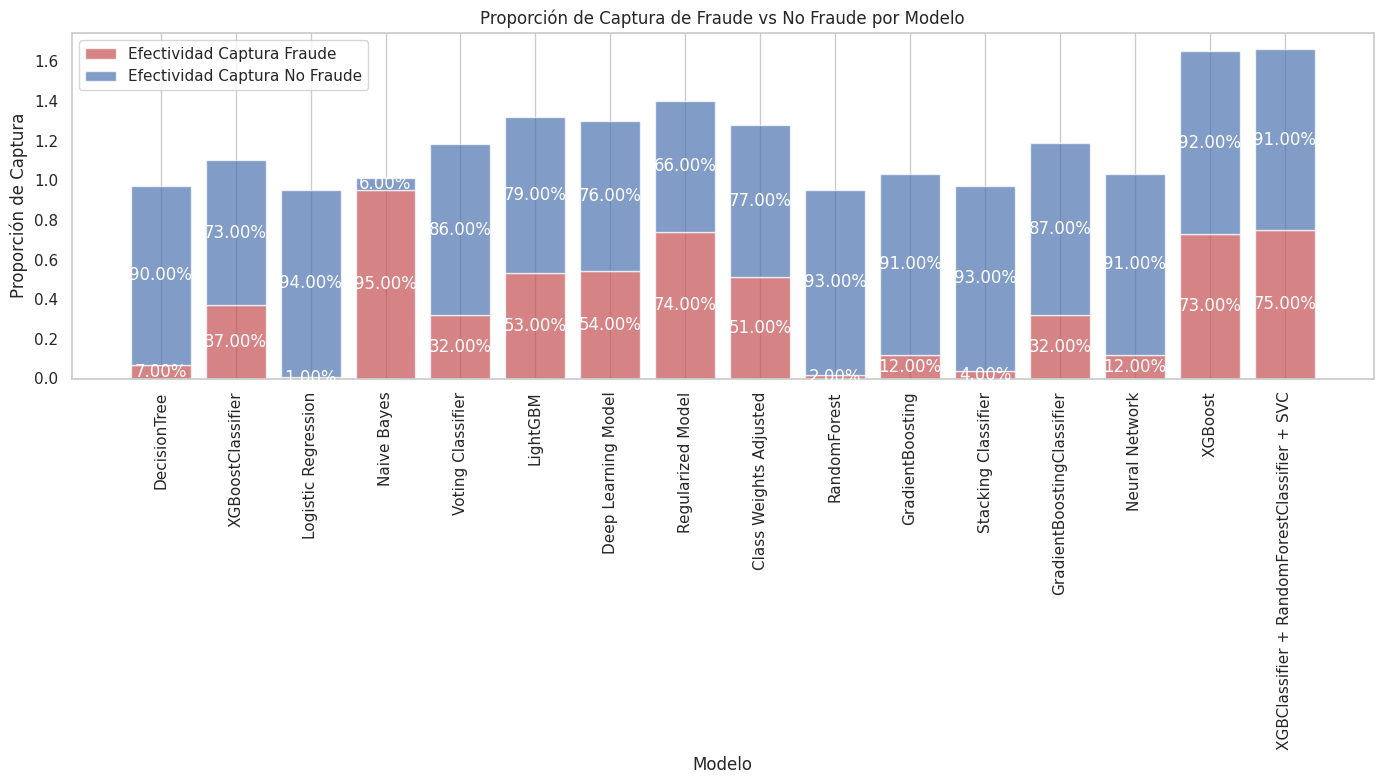

In [ ]:
#De forma final podemos apreciar un grafico de barra aplilada donde se aprecia que el ultimo modelo
#tiene el mejor performance sobrepasando por mucho los modelos iniciales
if data_final['Efectividad_captura_fraude'].dtype == 'object':
    data_final['Efectividad_captura_fraude'] = data_final['Efectividad_captura_fraude'].str.rstrip('%').astype('float') / 100.0
if data_final['Efectividad_captura_no_fraude'].dtype == 'object':
    data_final['Efectividad_captura_no_fraude'] = data_final['Efectividad_captura_no_fraude'].str.rstrip('%').astype('float') / 100.0

fig, ax = plt.subplots(figsize=(14, 8))

ind = np.arange(len(data_final['Modelo']))

p1 = ax.bar(ind, data_final['Efectividad_captura_fraude'], label='Efectividad Captura Fraude', color='r', alpha=0.7)
p2 = ax.bar(ind, data_final['Efectividad_captura_no_fraude'], bottom=data_final['Efectividad_captura_fraude'], label='Efectividad Captura No Fraude', color='b', alpha=0.7)

plt.title('Proporción de Captura de Fraude vs No Fraude por Modelo')
plt.xlabel('Modelo')
plt.ylabel('Proporción de Captura')
plt.xticks(ind, data_final['Modelo'], rotation=90)
plt.legend()
plt.grid(axis='y')

for i in range(len(p1)):
    height_fraude = p1[i].get_height()
    height_no_fraude = p2[i].get_height()
    ax.text(p1[i].get_x() + p1[i].get_width() / 2., height_fraude / 2., f'{height_fraude:.2%}', ha='center', va='center', color='white')
    ax.text(p2[i].get_x() + p2[i].get_width() / 2., height_fraude + height_no_fraude / 2., f'{height_no_fraude:.2%}', ha='center', va='center', color='white')

plt.tight_layout()
plt.show()
